<a href="https://colab.research.google.com/github/MarkovMarkowitz/MarkovMarkowitz/blob/main/ON2_MEF_v12H_MDD_IS_BEST_FOR_LB132D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:


# @title Markov Markowitz Company / Efficient Portfolio Generator
# @markdown ---
# @markdown Input parameters for portfolio

PORTFOLIO_OWNER = "ALPER" # @param {type:"string"}
OPTIMIZATION = "MDD"  # @param ['SHARPE', 'MDD', 'MINVAR']
# start date is 1825 days on 20.12.2023

OFFSET = 235 # @param {type:"number"}
LOOKBACK = 132 # @param {type:"number"}
BACKTEST = 126 # @param {type:"number"}
P_BOUND = 1 # @param {type:"number"}
PURSE = 100000  # @param {type: "number"}
EXCHANGE = "bist30"  # @param ['bist30', 'bist100', 'dow30', 'sp500']
COMISSION_PERCENT = 0.0006 # @param {type: "number"}
# @markdown ---
OPEN_CLOSE_SHARPE = False # @param {type: "boolean"}
NEGATIVE_SHARPE = False # @param {type: "boolean"}
NEGATIVE_MDD = False # @param {type: "boolean"}
SEND_MAIL = True # @param {type: "boolean"}
SAVE_PF = True # @param {type: "boolean"}

# @markdown ---

# 4 tip portföyün sonuçları Investor Presentation v1 olarak raporlandı.

In [ ]:
from datetime import date
today = date.today()

def GenerateNewPortfolioFilename():
  new = f"ON2_{PORTFOLIO_OWNER}_{OPTIMIZATION}_D{today}_P{PURSE/1000}K_{EXCHANGE}_LB{LOOKBACK}_OFF{OFFSET}_PB{P_BOUND}_NEG={NEGATIVE_SHARPE}_LONG={not OPEN_CLOSE_SHARPE}.xlsx"
  return new

In [ ]:
offset = OFFSET
look_back = LOOKBACK
CURRENT_T2 = PURSE
exchange = EXCHANGE

print("Selected = ", offset, look_back, CURRENT_T2, exchange)

Selected =  235 132 100000 bist30


In [ ]:
from datetime import date, timedelta, datetime

current_date = date.today().isoformat()
days_before = (date.today() - timedelta(days=look_back+offset)).isoformat()
days_after =  (date.today() + timedelta(days=1-offset)).isoformat()

backtest_start = (date.today() - timedelta(days=offset-1)).isoformat()
backtest_end =   (date.today() - timedelta(days=offset-BACKTEST)).isoformat()


print("\nCurrent Date: ",current_date)
print(f"{look_back+offset} days before current date: ",days_before)
print(f"{offset} days before current date: ",days_after)

STEP = 0
CHART = 0
dateStart = days_before
START_DATE = dateStart
END_DATE   = days_after
BACKTEST_START_DATE = backtest_start
BACKTEST_END_DATE = backtest_end

START_DATE, END_DATE
start_time = datetime.now()


print(f"Backtest start date: ",BACKTEST_START_DATE)
print(f"Backtest end date: ",BACKTEST_END_DATE)


Current Date:  2023-12-29
367 days before current date:  2022-12-27
235 days before current date:  2023-05-09
Backtest start date:  2023-05-09
Backtest end date:  2023-09-11



## Special Eyes-Only Report on
# **Individual Portfolio Analysis and Further Suggestions**
#### Report written by **Markov Markowitz Company**
#### Report issued on **27.08.2023**

Any comments should be sent to: info@markovmarkowitz.com



--------------------------------------------------

# Portfolio Construction with Maximum Win Probability and Maximum Sharpe Ratio Portfolio upon **BIST**100 Assets("**Borsa ISTanbul", Turkey**) using:

## 1. **Markov Chain Probabilistic Model**
## 2. **Markowitz's Modern Portfolio Theory**

Modern Portfolio Theory (MPT) is a Nobel Prize-winning economic theory.
It explains how risk-averse investors can construct portfolios to optimize or maximize expected return based on a given level of market risk. <a href = "https://en.wikipedia.org/wiki/Harry_Markowitz">Harry Markowitz</a> pioneered this theory in his paper <a href = "https://onlinelibrary.wiley.com/doi/full/10.1111/j.1540-6261.1952.tb01525.x">Portfolio Selection</a> , which was published in the Journal of Finance in 1952. He was later awarded a Nobel Prize for his work on modern portfolio theory. Modern Portfolio Theory suggests diversification of all your securities and asset classes and not putting all your eggs in one basket. It emphasises the importance of portfolios, diversification, risk and the connections among different kinds of securities.


## Table of contents
1. [Volatility](#volat)
2. [Variance and Standard Deviation](#type_vol)
3. [Managing Portfolio Variance and Portfolio Variance Formula](#manpor)
4. [Asset Selection](#asset_sel)
5. [Select Backtesting Testing Dates](#select_dates)
6. [Download the adjusted close prices of stocks](#downloads)
7. [Plotting daily prices of all the stocks](#plot_daily)
8. [Finding Daily returns](#daily_rets)
9. [Standard deviations volatility and covariance matrix](#stddevs)
10. [Correlation and heatmaps of correlation and effects on volatility](#heatmaps)
11. [Markovitz Model Explanation](#markovitz)
12. [Model portfolio with minimum risk amd its performance evaluation](#model)

## Volatility <a name="volat"></a>

Volatility is a statistical measure of the dispersion of returns for a given security or market index. In most cases, the higher the volatility, the riskier the security. Volatility is often measured as either the standard deviation or variance between returns from that same security or market index.

## Variance and Standard Deviation <a name="type_vol"></a>

Investors have to keep volatility in mind as well when choosing an investment. For example, a pension fund may need to be extra careful with its money and will want to ensure they aren’t getting into any extremely volatile investments. There are also hedge funds, which short stocks and even trade volatility with options. As you can see, whether you’re risk-seeking or risk-averse, the volatility (risk) of an investment is something you should care about.

A simple measure of volatility is the variance. Variance is used to see how far away each data point in a set is away from the mean. Variance is calculated with the following steps:

Take the difference between each data point and the mean Square each difference so that they're all positive values Sum up the squared results Divide this by the count of data points minus one $\sigma^2 = \frac{\sum(x_i - \overline{x}^2)}{n-1}$

where

$\sigma^2 = \textrm{Sample Variance}$

$x_i = \textrm{value of one observation}$

$\overline{x} = \textrm{mean of all observations}$

$n = \textrm{number of observations}$

The larger the variance, the further spread out it is from the mean. Variance treats all deviations from the mean the same way, regardless of whether they are less than or greater than the mean. A variance of zero would indicate that each data point is the same.

Standard deviation is easy to calculate once you have the variance. All you have to do is take the square root of the variance:

$\sigma = \sqrt{\sigma^2}$

where

$\sigma = \textrm{standard deviation}$

Standard deviation is another commonly used statistical measure to quantify market volatility. You would expect newer growth stocks to have higher standard deviations and more established blue-chip stocks to have lower standard deviations of returns. We will illustrate this by comparing daily returns from the last five years of the S&P 500 and NASDAQ, as well as Bitcoin prices. While Bitcoin isn't necessarily a growth stock, it's still very new compared to the S&P 500 and NASDAQ, so you would expect to see bigger swings in the price when compared to those two stock indices.

This is illustrated below by taking the standard deviations of returns over the last five years. These results are as expected: Both the S&P 500 and NASDAQ have very similar daily standard deviations. Bitcoin, on the other hand, has almost five times the standard deviation of the two stock indices.

## Managing Portfolio Variance and Portfolio Variance Formula <a name="manpor"></a>

In order to try to minimize portfolio variance, a good starting point is the formula itself to calculate variance with a two-asset portfolio.

$\textrm{Portfolio Variance} = w_x^2 \sigma_x^2 + w_y^2 \sigma_y^2 + 2w_x w_y Cov_{x,y}$

where

* $w_x$ = portfolio weight of asset x
* $w_y$ = portfolio weight of asset y
* $\sigma_x$ = standard deviation of asset x
* $\sigma_y$ = standard deviation of asset y
* $Cov_{x,y}$ = Covariance of the two assets

Also, building off the previous lesson this means that
$\textrm{Portfolio Standard Deviation} = \sqrt{\textrm{Portfolio Variance}}$



With this information in mind, there are 3 things we can do to minimize variance.

1. We can pick assets with lower standard deviations of returns. This may seem obvious, but if we really want to reduce the variance of our portfolio, the simplest thing to do is just pick assets that have relatively low volatilities.
2. Invest a higher percentage of your portfolio into your less risky asset(s). For our previous example with JPM and Bitcoin, we could further reduce our portfolio variance by investing a bigger portion of our funds into JPM since it had a lower standard deviation than Bitcoin.

Sometimes, it's the case that an investor may still want to invest in a riskier asset like Bitcoin. This brings us to the third thing we can do to reduce variance.

3. Check for assets with a low covariance. If you look at the right side of our portfolio variance function, you'll notice we have the covariance of two assets as a function parameter. If we can reduce that, we can reduce the overall variance of our portfolio.

This is an important point and should be expanded upon further.


## Covariance-Correlation Relationship
If you recall from a previous lesson, the formula for correlation is:

$\rho_{x,y} = \frac{Cov_{x,y}}{\sigma_x*\sigma_y}$

We can rearrange this to get the covariance formula:

$Cov_{x,y} = \rho_{x,y}\sigma_x\sigma_y$

Then, we can plug this back into our portfolio variance formula:

$\textrm{Portfolio Variance} = w_x^2 \sigma_x^2 + w_y^2 \sigma_y^2 + 2w_x w_y \rho_{x,y}\sigma_x\sigma_y$


These formulas are basically to show that we need to minimize correlations in order to minimize portfolio variance. Owning uncorrelated assets illustrates the efficient benefits of diversification. Let's write some reusable functions to sum up the work we did above and really display how this works with a few examples.


As seen in the formula, in order to minimize portfolio variance we need to minimize the covariance term. And this can be done by minimization coefficents of this covariance term


In [ ]:
# Installing and Importing the libraries

!pip3 install pandas
!pip3 install numpy
!pip3 install matplotlib
!pip3 install seaborn
!pip3 install scipy
!pip3 install nsepy
!pip3 install pyfolio


import time
start_time = time.time()


import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

from datetime import date
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import minimize
from nsepy import *

import os

from datetime import datetime
import time
import yfinance as yf



In [ ]:

from pathlib import Path

def GetSelectedStockList(exchange):

    from google.colab import files

    filename = f"{exchange}_selected.csv"
    my_file = Path(f"/content/{filename}")

    if my_file.is_file():
        stock_list = pd.read_csv(filename).Ticker
    else:
        files.upload_file(filename)
        stock_list = pd.read_csv(filename).Ticker

    print(stock_list)
    return(stock_list)

stock_list = GetSelectedStockList(exchange)



0     YKBNK.IS
1     KOZAA.IS
2     BIMAS.IS
3     AKBNK.IS
4     PGSUS.IS
5     GARAN.IS
6     ENKAI.IS
7     TAVHL.IS
8     TCELL.IS
9     SAHOL.IS
10    KOZAL.IS
11    EKGYO.IS
12    ISCTR.IS
13    THYAO.IS
14    ASELS.IS
15    PETKM.IS
16    TOASO.IS
17    EREGL.IS
18    TUPRS.IS
19    FROTO.IS
20    KRDMD.IS
21    ALARK.IS
22     SISE.IS
23    GUBRF.IS
24    ARCLK.IS
Name: Ticker, dtype: object


In [ ]:
def NextStep():
    global STEP
    STEP+=1
    print(70*'_')
    print(f"\nPerforming STEP-{STEP}:")

def NextChart():
    global CHART
    CHART+=1

In [ ]:
# from datetime import date, timedelta



# current_date = date.today().isoformat()
# days_before = (date.today() - timedelta(days=look_back+offset)).isoformat()
# days_after =  (date.today() + timedelta(days=1-offset)).isoformat()

# print("\nCurrent Date: ",current_date)
# print(f"{look_back+offset} days before current date: ",days_before)
# print(f"{offset} days before current date: ",days_after)

# STEP = 0
# CHART = 0
# dateStart = days_before
# START_DATE = dateStart
# END_DATE   = days_after
# START_DATE, END_DATE
# start_time = datetime.now()


****************************************************************
Starting Download ...
****************************************************************
****************************************************************
****************************************************************


<Figure size 640x480 with 0 Axes>

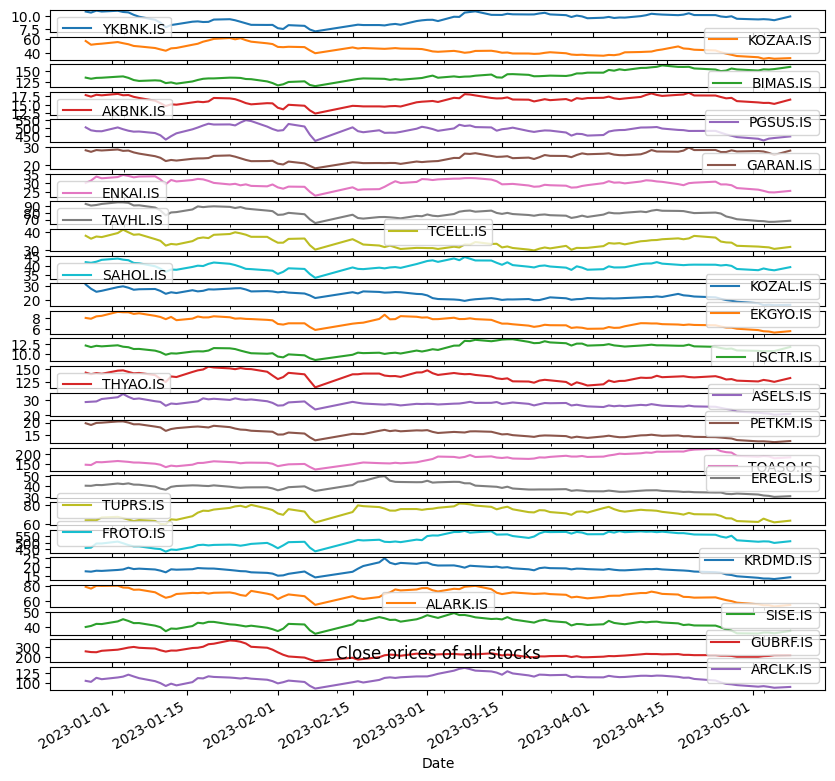

Sharpe Ratio = -2.9918032786885247
Max Sharpe Ratio = 0.17133956386292837
Max Sharpe Ratio Return = 0.34
Max Sharpe Ratio Volatility = 0.642


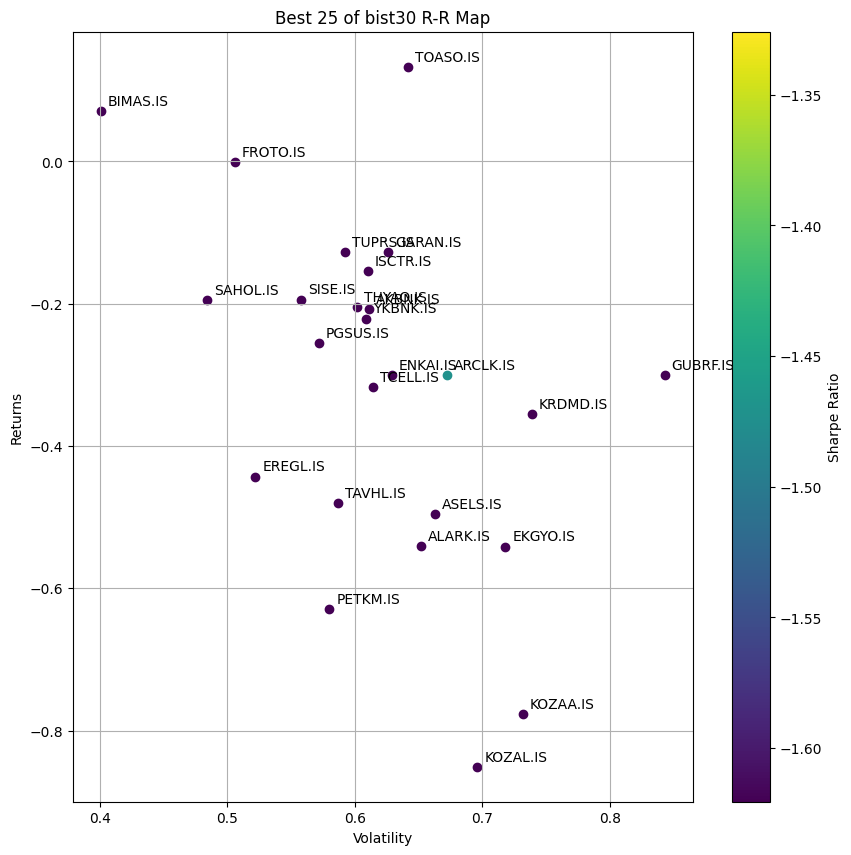

Max Sharpe Ratio = 0.17133956386292837
Max Sharpe Ratio Return = 0.34
Max Sharpe Ratio Volatility = 0.642


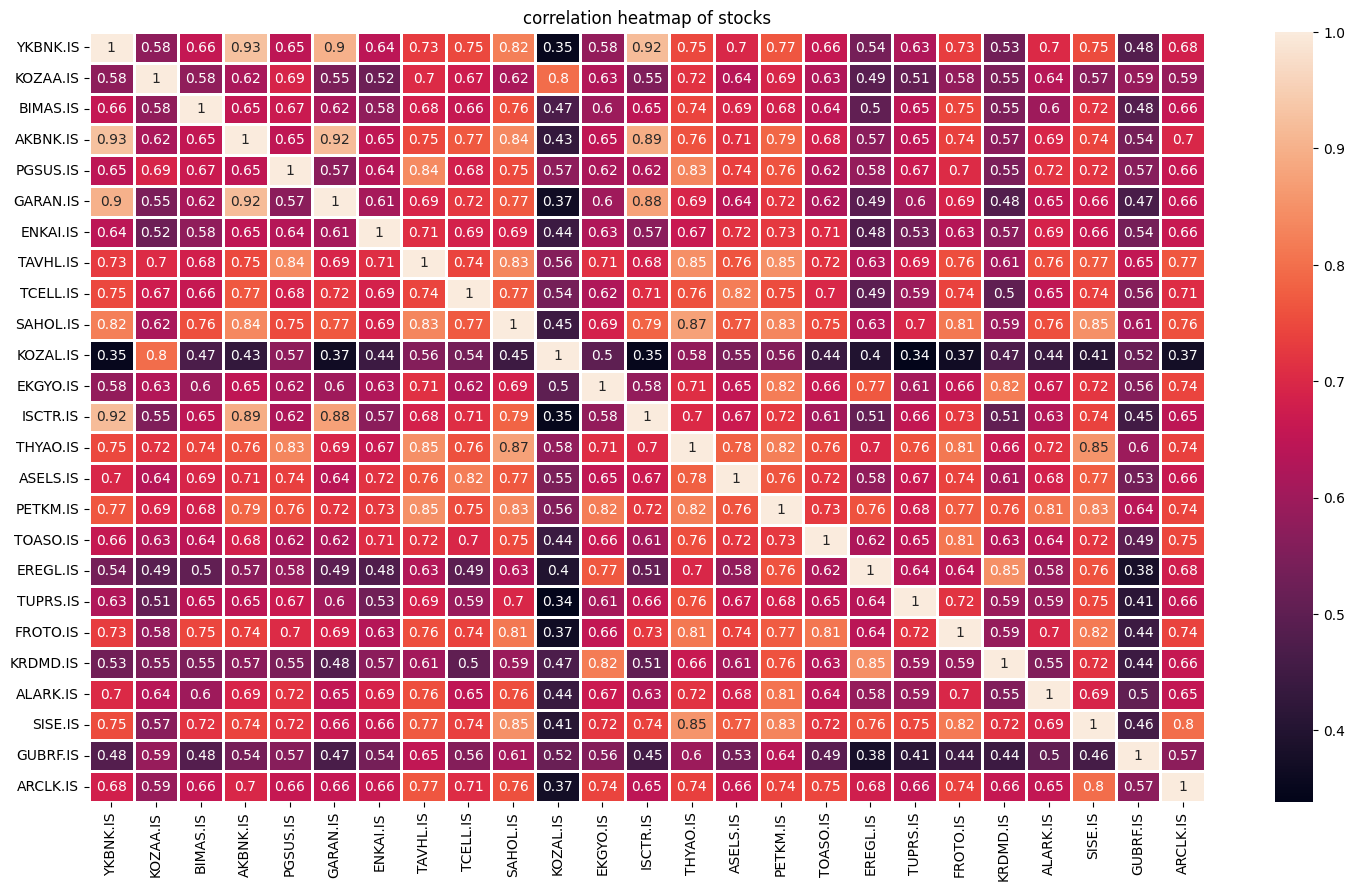

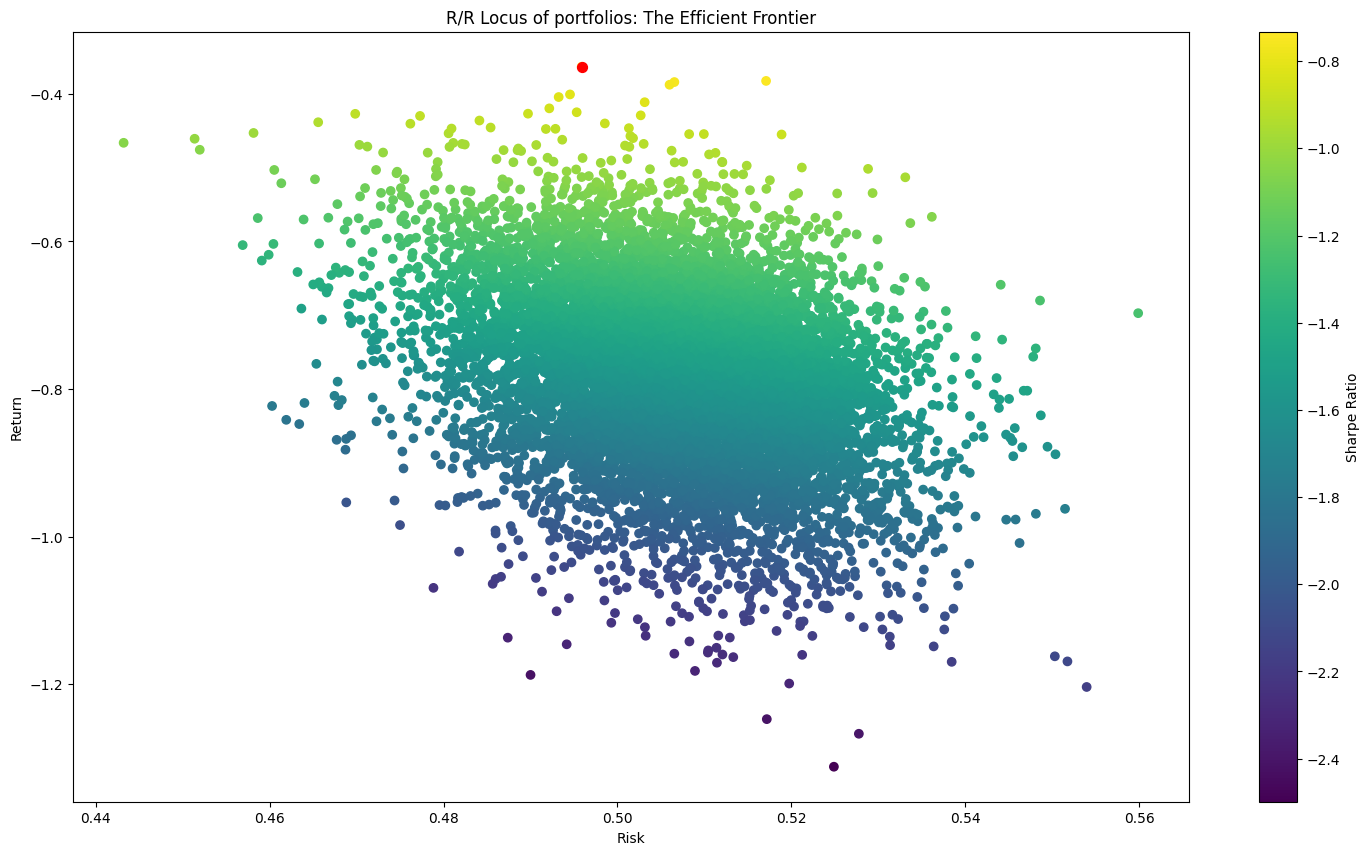

Max Sharpe Ratio = -0.7325243047326276
Max Sharpe Ratio Return = -0.3632474549601307
Max Sharpe Ratio Volatility = 0.4958845086958808
[0.38144601 0.38144598 0.38144609 0.38144571 0.38144569 0.38144596
 0.38144567 0.38144566 0.38144566 0.38144592 0.38144618 0.38144618
 0.38144582 0.38144598 0.38144617 0.38144663 0.38144608 0.38144671
 0.38144615 0.38144574]
{'return': -0.20697260852143984, 'risk': 0.3814459800110011, 'sharpe': -1.1586768026987546, 'MDD': -0.1627945733753147}
% weights of minimum volatility PF with 25 assets
------------------------------------------------------------
              %  Amounts for Capital of 100000 TL
Ticker                                           
YKBNK.IS   0.00                               0.0
KOZAA.IS   0.00                               0.0
BIMAS.IS  72.84                           72840.0
AKBNK.IS   0.00                               0.0
PGSUS.IS   0.00                               0.0
GARAN.IS   0.00                               0.0
ENKAI.IS  

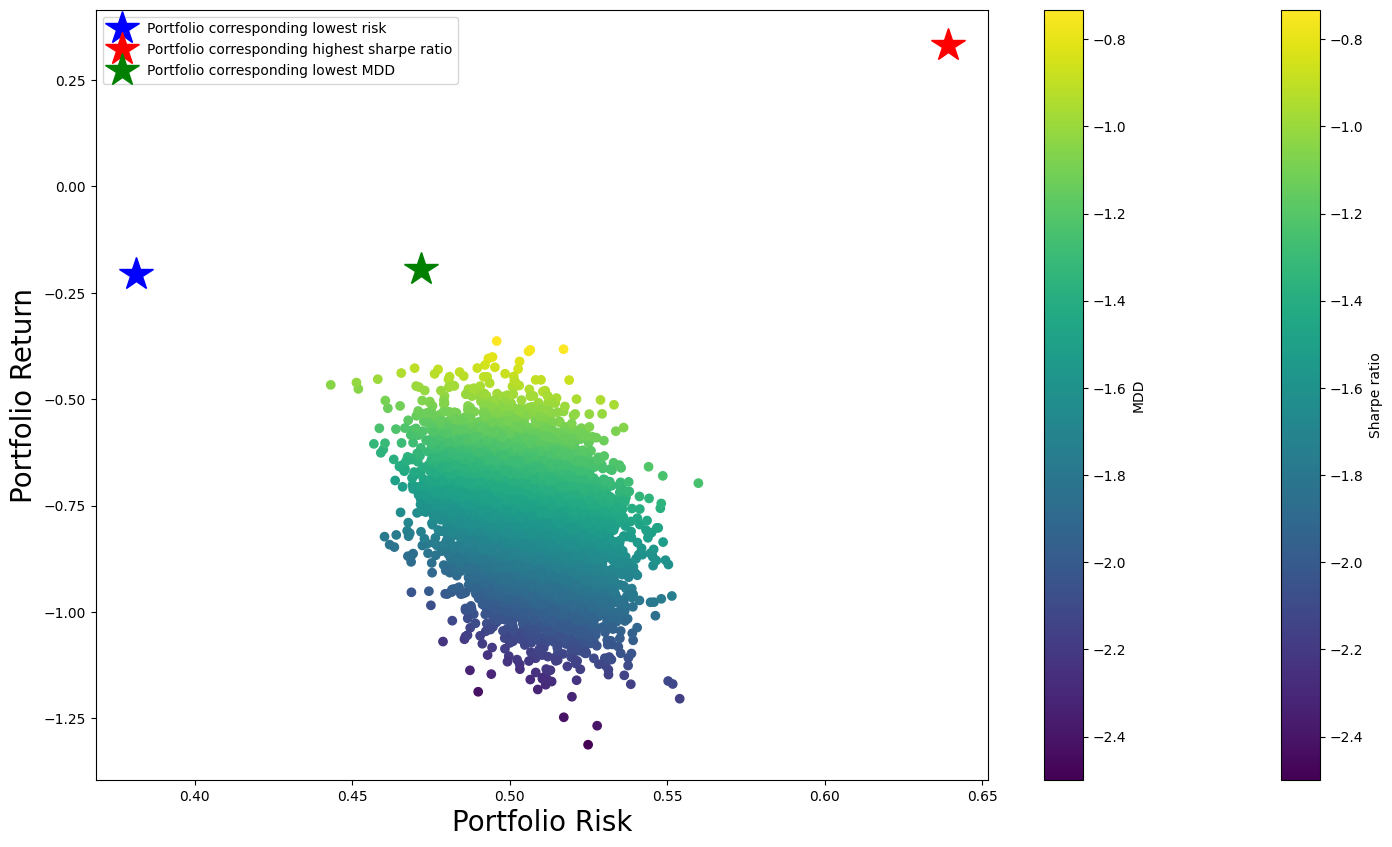

In [ ]:




# ### Download the adjusted close prices of stocks <a name="downloads"></a>

# In[4]:

LENGTH = 64



price_list = []

print(LENGTH*"*")
print("Starting Download ...")
print(LENGTH*"*")
for tick in stock_list:
        print(f"Downloading {tick}")
        yf_tick = yf.Ticker(tick)
        df = yf_tick.history(interval='1d', auto_adjust=True, start=START_DATE, end=END_DATE, back_adjust = True, rounding=True)
        df.dropna(how='all', inplace=True)
        price_list.append(df)
print(LENGTH*"*")

print(LENGTH*"*")

## Save datafiles to disk

for i,df in enumerate(price_list):
        df.to_csv(f"{stock_list[i]}.csv")


# In[5]:


import pandas as pd
import os
Stocks = stock_list
pf_data = pd.DataFrame()
li = pd.DataFrame() # my real portfolio dataframe for close
lu = pd.DataFrame() # my real portfolio dataframe for open
rets = pd.DataFrame()
names = []
count = len(Stocks)

# os.chdir(wd)
#for file in sorted2.Stock:
for file in Stocks:
    pf_data = pd.read_csv(f"{file}.csv", index_col='Date', parse_dates=True, keep_date_col = True, infer_datetime_format=True, dayfirst=True, decimal="." )

    li = pd.concat( [li,pf_data['Close']],axis=1) #, ignore_index=True)
    lu = pd.concat( [lu,pf_data['Open']],axis=1) #, ignore_index=True)
    # st_name = file.split('.',maxsplit = 1)
    # names.append(st_name[0])
    names.append(file)

li.columns = names
lu.columns = names

li = li.rename_axis(index="Date")
lu = lu.rename_axis(index="Date")

pf_data = li.sort_values(by=['Date'], ascending=[True])
pf_data_open = lu.sort_values(by=['Date'], ascending=[True])

pf_data.to_csv(f'{exchange}.csv')
pf_data_open.to_csv(f'{exchange}_open.csv')


plt.figure()
pf_data.plot(subplots = True,figsize = (10,10))
plt.title("Close prices of all stocks")
plt.savefig("Fig1_ClosePrices.jpg", format='jpg', dpi=300)
plt.show()
if  OPEN_CLOSE_SHARPE:
  log_returns = np.log(pf_data_open / pf_data.shift(1)) - COMISSION_PERCENT*2
else:
  log_returns = np.log(pf_data/pf_data.shift(1)) - COMISSION_PERCENT*2


#log_returns = (data['Adj Open'] - data['Adj Close'].shift(1)) / data['Adj Close'].shift(1) - COMISSION_PERCENT*2)


log_returns

log_returns.describe()
np.round(log_returns.mean(),4)
yearly_rets = np.round(log_returns.mean() * 252,2) # Mean returns annualized for year
yearly_rets

vol = np.round(log_returns.std()*np.sqrt(252),3) # annualized version of std deviation
vol

risk_free_rate = 0.23

sharpe = (yearly_rets - risk_free_rate)/vol
sharpe

max_sr_vol = vol[sharpe.argmax()] # risk corresponding to maximum sharpe ratio
max_sr_ret = yearly_rets[sharpe.argmax()] # return corresponding to maximum sharpe ratio

def PrintSharpePerformance():
    yearly_rets = np.round(log_returns.mean() * 252,2) # Mean returns annualized for year
    yearly_rets
    vol = np.round(log_returns.std()*np.sqrt(252),3) # annualized version of std deviation
    vol
    sharpe = (yearly_rets - risk_free_rate)/vol
    sharpe
    max_sr_vol = vol[sharpe.argmax()] # risk corresponding to maximum sharpe ratio
    max_sr_ret = yearly_rets[sharpe.argmax()] # return corresponding to maximum sharpe ratio

    ASSETS = log_returns.mean().index

    print(f"Sharpe Ratio = {sharpe[1]}")
    print(f"Max Sharpe Ratio = {sharpe.max()}")
    print(f"Max Sharpe Ratio Return = {max_sr_ret}")
    print(f"Max Sharpe Ratio Volatility = {max_sr_vol}")
    return vol, ASSETS,sharpe


def plot_with_labels(coord, labels, sharpe):
    assert len(coord) == len(labels), 'coord len is not equal to labels len'
    plt.figure(figsize=(10, 10))  # in inches
    for i, label in enumerate(labels): #get (0, label)
        x, y = coord[i] #2 dim
        #plt.scatter(x, y)
        # yearly_rets = np.round(log_returns.mean() * 252,2) # Mean returns annualized for year
        # vol = np.round(log_returns.std()*np.sqrt(252),3) # annualized version of std deviation

        #sharpe = (y - risk_free_rate)/x
        plt.scatter(x, y, c=sharpe[i], cmap='viridis')
        plt.annotate(label,
                xy=(x, y), #show point
                xytext=(5, 2), #show annotate
                textcoords='offset points',
                ha='left',
                va='bottom')

    plt.colorbar(label='Sharpe Ratio')
    plt.xlabel('Volatility')
    plt.ylabel('Returns')
    plt.grid(True)
    plt.title(f'Best {len(log_returns.mean())} of {exchange} R-R Map')
    plt.savefig("Fig2_R-R_Map.jpg", format='jpg', dpi=300)
    plt.show()
    return "Fig2_R-R_Map.jpg"

def PlotRRMap():
    coord = list(zip(vol, log_returns.mean()*100))
    labels = ASSETS
    aa = plot_with_labels(coord, labels, sharpe)

    from IPython.display import Image
    Image(url=aa)

vol, ASSETS,sharpe = PrintSharpePerformance()

PlotRRMap()

print(f"Max Sharpe Ratio = {sharpe.max()}")
print(f"Max Sharpe Ratio Return = {max_sr_ret}")
print(f"Max Sharpe Ratio Volatility = {max_sr_vol}")


plt.figure(figsize=(18,10))
sns.heatmap(log_returns.corr(),linecolor='white',linewidths=1,annot=True)
plt.title("correlation heatmap of stocks")
plt.savefig("Fig3_Correlation_Heatmap.jpg", format='jpg', dpi=300)
plt.show()


#sns.pairplot(log_returns,palette='coolwarm')
#plt.show()


# - The pair plots also signify the same result that there is no pair of stocks with high negative correlation. We don't find any pair-plot with upper-left to lower-right pattern.
# - The pairs with high positive correlation have scatter plot with lower-left to upper-right pattern .
# - Other pairs don't form any pattern.

# # Markowitz Model
#
#
#
#
#

#
# - We model our assets by their expected return, $E[R]$ and their risk, which is expressed as their standard deviation, $\sigma$

# - Our investment decisions are expressed by investing 100% of our wealth in assets( here, stocks), where each particular investment represents a proportion of our total wealth.

#
# - We will now implement Markowitz Model. This model assists in the selection of the most efficient portfolios by analyzing various possible portfolios of the selected stocks.

# - We invest $w_i$ in $stock_i$ for every i, such that

#  <h3>$$\Sigma^{n}_{i=1} w_i = 1$$</h3>

# - The expected return of the portfolio constructed would be

# <h3>
# $$E[R_p] = \Sigma^{n}_{i=1} w_i E[R_i]$$</h3>

# and the risk associated with the portfolio would be
#

# <h3>$$\sigma^2(R_p) = \Sigma^{n}_{i=1} w_i^2 \sigma^2(R_i) + \Sigma^{}_{i=1}\Sigma^{}_{j {\neq} i} w_i w_j \sigma(R_i) \sigma(R_j) \rho_{ij}$$</h3>

# $E[R_i]$ is the annual expected return of $i$th stock, $\sigma(R_i)$ corrsponds to annual standard deviation of $i$th stock and $\rho_{ij}$ is the correlation between the logarithmic returns $i$th and the $j$th stock.

# - $E[R_p]$ is the annual expected return of the portfolio and $\sigma(R_p)$ is the risk associated with the portfolio (Also the standard deviation of the portfolio)

# - An efficient portfolio is one that maximizes return for a given level of risk. Our task is to select adequate weights $w_i$ to get the efficient portfolio

# #### Implementation

# -  Let $W_{1 \times n}$ be a array containing the weights $w_i$ such that $\Sigma^{n}_{i=1} w_i = 1$ and $E[R]_{ n\times 1}$ be another array containing annual expected returns of n stocks present in the portfolio and $C$ be the covariance matrix of annual returns of  stocks, then

# <h3>$$E[R_p] = WE[R]$$</h3>

#
# $$ \sigma^2(R_p) = W^TCW $$

# ### Sharpe Ratio
#
# - It is a statistical measure used in Modern Portfolio Theory.
# - The Sharpe ratio measures the performance of an investment compared to a risk-free asset, after adjusting for its risk. It is defined as the difference between the returns of the investment and the risk-free return, divided by the standard deviation of the investment.
# - A portfolio with a higher Sharpe ratio is considered to have best risk-adjusted returns.
#
#
#
#

# $$ S = \frac{E[R_p] - R_f}{\sigma(R_p)} $$

# Here, $R_f$ is the risk free rate of return. We have taken risk free rate as 10 year government bond rate in Turkey.

# In[22]:


# A function for generating a numpy array containing random weights that add upto 1
def RandWeights(size):
    weight = np.random.dirichlet(np.ones(size))
    return weight


# In[23]:

def calculate_MDD(historical_prices, weights):
    """
    Calculate the Maximum Drawdown (MDD) of the portfolio.

    :param historical_prices: DataFrame, historical prices of assets in the portfolio
    :param weights: array-like, weights of the assets in the portfolio
    :return: float, Maximum Drawdown of the portfolio
    """
    # Calculate daily portfolio value
    portfolio_values = (historical_prices * weights).sum(axis=1)

    # Calculate the cumulative maximum value up to each point
    cumulative_max = portfolio_values.cummax()

    # Calculate drawdowns
    drawdowns = (portfolio_values - cumulative_max) / cumulative_max

    # MDD is the maximum drawdown
    MDD = drawdowns.min()

    return MDD

risk_free_rate = 0.235 # quite high in Turkey !

# A function to generate the avg return, risk and the sharpe ratio of the portfolio
# correponding to the weight array passed
def portfolio_stats(weight):

    # Convert to array in case list was passed instead.
    weight = np.array(weight)
    port_return = np.sum(log_returns.mean() * weight) * 250
    port_risk = np.sqrt(np.dot(weight.T, np.dot(log_returns.cov() * 250, weight)))
    sharpe = (port_return - risk_free_rate)/port_risk
    MDD = calculate_MDD(pf_data, weight)

    return {'return': port_return, 'risk': port_risk, 'sharpe': sharpe, 'MDD': MDD}


# In[24]:


# Trying to generate random weights

length = len(log_returns.columns)
weight = RandWeights(length)

# Generating Portfolio Statistics
pf_stats = portfolio_stats(weight)

pf_return = pf_stats['return']
pf_risk = pf_stats['risk']
sharpe_ratio = pf_stats['sharpe']




# #### We will now run a monte carlo simulation to generate random portfolios. We will use the results of simulation to draw an efficient frontier

# In[30]:


def Monte_Carlo(iterations):
    portfolio_returns = []
    portfolio_risks = []
    for x in range (iterations):
        weight = RandWeights(length)
        pf_stats = portfolio_stats(weight)
        portfolio_returns.append(pf_stats['return'])
        portfolio_risks.append(pf_stats['risk'])

    portfolio_returns = np.array(portfolio_returns)
    portfolio_risks = np.array(portfolio_risks)
    return portfolio_returns, portfolio_risks


# In[31]:


portfolio_returns, portfolio_risks = Monte_Carlo(10000)
sharpe = portfolio_returns / portfolio_risks
max_sr_ret = portfolio_returns[sharpe.argmax()] # return corresponding to maximum sharpe ratio
max_sr_vol = portfolio_risks[sharpe.argmax()] # risk corresponding to maximum sharpe ratio
max_sr_ret


# In[32]:


plt.figure(figsize=(18,10))
plt.scatter(portfolio_risks, portfolio_returns, c=sharpe, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Risk')
plt.ylabel('Return')
plt.title('R/R Locus of portfolios: The Efficient Frontier')
plt.scatter(max_sr_vol, max_sr_ret,c='red', s=50) # red dot
plt.savefig("Fig4_RR_Locus.jpg", format='jpg', dpi=300)
plt.show()
print(f"Max Sharpe Ratio = {sharpe.max()}")
print(f"Max Sharpe Ratio Return = {max_sr_ret}")
print(f"Max Sharpe Ratio Volatility = {max_sr_vol}")


# - The above plot shows comparison of all portfolio combinations generated in Mone Carlo Simulation in terms of their risk and return. The red dot corresponds to the portfolio having the highest sharpe ratio amoung the generated portfolios. ( This portfolio may not be the one with highest sharpe ratio as we are plotting random portfolios. It is just the portfolio with highest sharpe ratio amoung all the randomly generated portfolios)

# - We will now try to generate optimized portffolios subject to various conditions

# - This hyperbolic plot is called 'Markowitz's Bullet'

# #### Using Optimization to find portfolio with max sharpe ratio
# - The below function returns the weights array cooresponding to the portfolio with the highest Sharpe Ratio
# - We are using Scipy.optimize.minimize. We are trying to minimize negative Sharpe Ratio (which is same as maximising the sharpe ratio)
# - The constraint for optimization is -> Sum of all the weights has to be 1, and all the weights are bounded between 0 and 1

# - The optimization is successful.
#

# - The required weights are in the key x

# #### Using Optimisation to find portfolio that has minimum risk for a given expected return
#
# - Sometimes, the investors want to have a portfolio with a fixed targert return.
# - They want to find portfolio that would provide that return with minimum risk involved

#

# #### Finding portfolio that provide the minimum risk

# In[33]:


def OptimizingForLowestMDD():

    def fun(weight):
        pf_stats = portfolio_stats(weight)
        if NEGATIVE_MDD:
          return pf_stats['MDD']
        else:
          return -pf_stats['MDD']

    res = minimize(
          fun,
          RandWeights(length),
          method = 'SLSQP',
          constraints=[
            {'type': 'eq', 'fun': lambda w: np.sum(w) - 1.}
          ],
          bounds=[(0, P_BOUND) for i in range(length)]
        )

    return res

def OptimizationWithSharpeRatio():

    def FindNegSharpe(weight):
      if NEGATIVE_SHARPE:
        return portfolio_stats(weight)['sharpe']
      else:
        return -portfolio_stats(weight)['sharpe']



    res = minimize(
          FindNegSharpe,
          RandWeights(length),
          method = 'SLSQP',
          constraints=[
            {'type': 'eq', 'fun': lambda w: np.sum(w) - 1.},
          ],
          bounds=[(0, P_BOUND) for i in range(length)]
        )

    return res

def OptimizingWithMinRisk():

    def fun(weight):
        pf_stats = portfolio_stats(weight)
        _risk = pf_stats['risk']
        return _risk


    res = minimize(
      fun,
      RandWeights(length),
      method = 'SLSQP',
      constraints=[
        {'type': 'eq', 'fun': lambda w: np.sum(w) - 1.},
      ],
      bounds=[(0., P_BOUND) for i in range(length)]
    )

    return res


# In[34]:


#OptimizingWithMinRisk()


# ### Plotting the efficient Frontier

# - The efficient frontier is the set of optimal portfolios that offer the highest expected return for a defined level of risk or the lowest risk for a given level of expected return. Portfolios that lie below the efficient frontier are sub-optimal because they do not provide enough return for the level of risk.
#
#
#
#

# - We will plot the efficient frontier by taking the optimal portfolios for all possible returns

# In[35]:


target_returns = np.linspace(portfolio_returns.min(), portfolio_returns.max(),20)

minimal_risks = []
for target_return in target_returns:
    optimal = OptimizingWithMinRisk()
    minimal_risks.append(optimal['fun'])

minimal_risks = np.array(minimal_risks)
print(minimal_risks)


# In[36]:


plt.figure(figsize=(18,10))

plt.scatter(portfolio_risks, portfolio_returns,
            c = ( portfolio_returns / portfolio_risks),
            marker = 'o')

# Plotting the efficient frontier
# plt.scatter(minimal_risks,
#             target_returns,
#             c = (target_returns / minimal_risks),
#             marker = 'x')


#Plotting the optimal portfolio that has lowest risk
Optimal_weights_For_Lowest_Risk = OptimizingWithMinRisk().x
Optimal_weights_For_Highest_Sharpe = OptimizationWithSharpeRatio().x
Optimal_weights_For_Lowest_MDD = OptimizingForLowestMDD().x

plt.plot(portfolio_stats(Optimal_weights_For_Lowest_Risk)['risk'],
         portfolio_stats(Optimal_weights_For_Lowest_Risk)['return'],
         'b*',
         markersize = 25.0, label = "Portfolio corresponding lowest risk ")


plt.plot(portfolio_stats(Optimal_weights_For_Highest_Sharpe)['risk'],
         portfolio_stats(Optimal_weights_For_Highest_Sharpe)['return'],
         'r*',
         markersize = 25.0, label = "Portfolio corresponding highest sharpe ratio")


plt.xlabel('Portfolio Risk',fontsize = 20)
plt.ylabel('Portfolio Return', fontsize = 20)
plt.legend(prop={'size': 10})
plt.colorbar(label='Sharpe ratio')


# - The efficient frontier is different for different investors, depending upon the assets they are holding
#
#

plt.plot(portfolio_stats(Optimal_weights_For_Lowest_MDD)['risk'],
         portfolio_stats(Optimal_weights_For_Lowest_MDD)['return'],
         'g*',
         markersize = 25.0, label = "Portfolio corresponding lowest MDD ")

plt.xlabel('Portfolio Risk',fontsize = 20)
plt.ylabel('Portfolio Return', fontsize = 20)
plt.legend(prop={'size': 10})
plt.colorbar(label='MDD')

# - There is nothing like a single optimal portfolio. The efficient frontier is the collection of optimal portfolios.

# - The investors can choose any optimal portfolio depending upon the risk they can take

# In[37]:

if OPTIMIZATION == 'SHARPE':
  w = np.round(Optimal_weights_For_Highest_Sharpe, 4)
  index = w>=0.00
  print(portfolio_stats(Optimal_weights_For_Highest_Sharpe))
  print(f"% weights of maximum sharpe ratio PF with {len(index)} assets")
elif OPTIMIZATION == 'MDD':
  w = np.round(Optimal_weights_For_Lowest_MDD,4)
  index = w>=0.00
  print(portfolio_stats(Optimal_weights_For_Lowest_MDD))
  print(f"% weights of minimum MDD PF with {len(index)} assets")
else:
  w = np.round(Optimal_weights_For_Lowest_Risk,4)
  index = w>=0.00
  print(portfolio_stats(Optimal_weights_For_Lowest_Risk))
  print(f"% weights of minimum volatility PF with {len(index)} assets")


# In[38]:


BEST_PF = pd.Series(w*100, log_returns.columns)
print (60*"-")

BEST_PF[index].round(3)


# In[39]:

BEST_PF = pd.Series(w*100, stock_list)
Final_TEFAS_PF = pd.DataFrame(BEST_PF[index].round(4),  columns=['%'] )
Portfolio_Weights = np.round(w[index],4)
Portfolio_Assets = BEST_PF[index]
Portfolio_Amounts = Portfolio_Weights*100000
Final_TEFAS_PF['Amounts for Capital of 100000 TL'] = Portfolio_Amounts
Final_TEFAS_PF.sort_values(by=['%'], ascending=[False])


# In[40]:


import datetime

import pandas as pd
import pandas_datareader.data as web
import seaborn as sns
from IPython.display import VimeoVideo


# In[41]:


def getReturns(startTime, endTime, tickers):

    # pull price data from yahoo -- (list(tickers.keys())) = ['^GSPC','^RUT']
    prices = web.DataReader(stock_list, "yahoo", START_DATE, END_DATE)["Adj Close"]
    prices = prices.dropna()
    returns = prices.pct_change()
    return prices.pct_change()


# In[42]:


def compareVariance(startTime, endTime, tickers, weights):
    returns = getReturns(startTime, endTime, tickers)
    tmp = weights * returns
    returns[f"Portfolio w/ weights {Portfolio_Weights}"] = tmp[tmp.columns[0]] + tmp[tmp.columns[1]]
    standardDev = returns.std()
    avgReturns = returns.mean()
    res = pd.concat([avgReturns * 100, standardDev*100], axis=1)
    res.columns = ["Daily Average Return %", "Standard Deviation of Returns %"]
    return res.round(3)


import pyfolio

print(Final_TEFAS_PF)

Portfolio_Amounts = np.multiply(100000, Portfolio_Weights )
InitialPrices = pf_data.iloc[0,0:]

Portfolio_Shares = np.trunc((Portfolio_Amounts / InitialPrices)) # determine shares

np.shape(Portfolio_Shares)

Prices = pf_data.iloc[:,0:]
Prices


pf_data['Portfolio'] = np.dot(Portfolio_Shares, Prices.T)  # PF_VALUE = dot product of shares and their prices !!!!
pf_data['PF_Rets'] = pf_data['Portfolio'].pct_change()





Start date,2022-12-28
End date,2023-05-08
Total months,4
,Backtest
Annual return,17.7%
Cumulative returns,5.8%
Annual volatility,39.3%
Sharpe ratio,0.60
Calmar ratio,1.07
Stability,0.43
Max drawdown,-16.5%


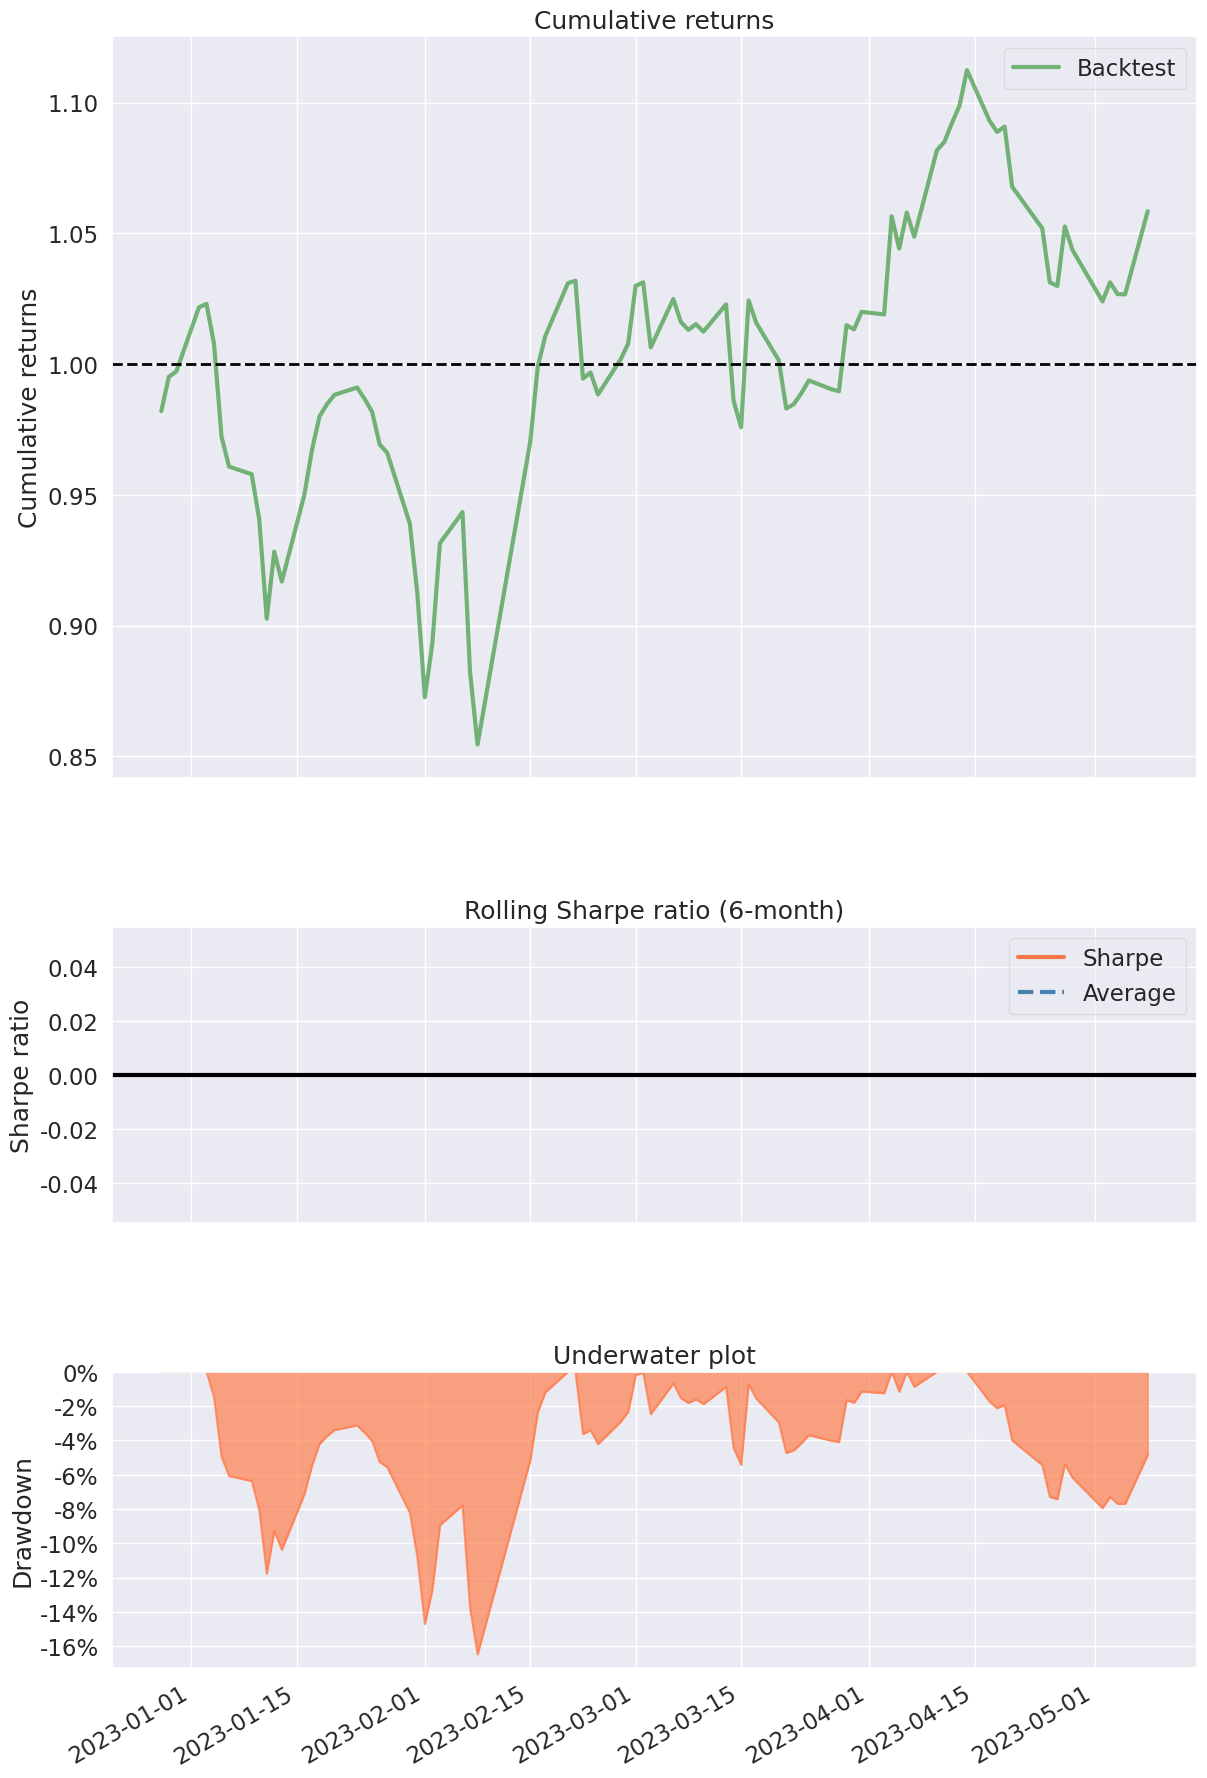

In [ ]:
pyfolio.create_simple_tear_sheet(pf_data['PF_Rets'].dropna())

In [ ]:
Portfolio_Amounts = np.round(CURRENT_T2*Portfolio_Weights,4)

In [ ]:
InitialPrices = pf_data.iloc[0,0:]

In [ ]:
show_df = pd.DataFrame({"assets":Portfolio_Assets.index.T, "%": np.round(100*Portfolio_Weights,4), "Amount": Portfolio_Amounts})
show_df = show_df.loc[(show_df["%"]>0)]
show_df = show_df.sort_values(by=['%'],ascending=False)
show_df



,assets,%,Amount
2,BIMAS.IS,72.84,72840.0
17,EREGL.IS,23.65,23650.0
10,KOZAL.IS,3.51,3510.0


In [ ]:
last_prices = pf_data.iloc[-1,0:]
last_prices

YKBNK.IS          9.910000
KOZAA.IS         32.300000
BIMAS.IS        158.670000
AKBNK.IS         16.490000
PGSUS.IS        447.900000
GARAN.IS         27.840000
ENKAI.IS         25.780000
TAVHL.IS         68.100000
TCELL.IS         31.870000
SAHOL.IS         39.200000
KOZAL.IS         16.350000
EKGYO.IS          5.550000
ISCTR.IS         11.710000
THYAO.IS        132.800000
ASELS.IS         20.780000
PETKM.IS         12.610000
TOASO.IS        184.900000
EREGL.IS         30.620000
TUPRS.IS         63.690000
FROTO.IS        511.420000
KRDMD.IS         14.290000
ALARK.IS         54.610000
SISE.IS          37.780000
GUBRF.IS        220.500000
ARCLK.IS         90.530000
Portfolio    105779.230000
PF_Rets           0.030936
Name: 2023-05-08 00:00:00+03:00, dtype: float64

In [ ]:
portfolio_assets_last_prices = last_prices.loc[show_df['assets']]


In [ ]:
print("Last prices are:")
print("-----------------")
print(portfolio_assets_last_prices)

show_df['buy_price'] = portfolio_assets_last_prices.values
show_df['shares_to_buy'] = np.trunc(show_df['Amount'] / portfolio_assets_last_prices.values)
show_df


Last prices are:
-----------------
BIMAS.IS    158.67
EREGL.IS     30.62
KOZAL.IS     16.35
Name: 2023-05-08 00:00:00+03:00, dtype: float64


,assets,%,Amount,buy_price,shares_to_buy
2,BIMAS.IS,72.84,72840.0,158.67,459.0
17,EREGL.IS,23.65,23650.0,30.62,772.0
10,KOZAL.IS,3.51,3510.0,16.35,214.0


In [ ]:

def ConstructPortfolioTimeSeries(portfolio):
    NextStep()
    print(f"Construct Time series...")
    # print(f"portfolio = {portfolio} is input")
    print(70*'=')

    Residue_Cash = CURRENT_T2
    #os.chdir(wd)

    OrderedTable = pd.DataFrame()
    df = pd.DataFrame()
    names = show_df.assets
    #print(names)
    filename = f"{names.iloc[0]}.csv"
    #print(filename)

    df = pd.read_csv(filename) #change 1
    #df = pd.read_csv(filename, index_col='Date', parse_dates=True, keep_date_col = True, infer_datetime_format=True, dayfirst=True, decimal=",")

    OrderedTable["Date"] = df.iloc[:,0] #change 3

    # init_weight = np.round(1/len(names),5)
    # Portfolio_Weights = [ init_weight for i in range(len(names))]

    portfolio['Portfolio_Weights'] = portfolio['%']/100

    for tick in names:
        #print(f"Fetching {tick}")
        filename = f"{tick}.csv"
        #filename = f"{names[0]+'.IS'}.csv"

        df = pd.read_csv(filename)
        #df = pd.read_csv(filename, index_col='Date', parse_dates=True, keep_date_col = True, infer_datetime_format=True, dayfirst=True, decimal=",") #change 2
        OrderedTable[f"{tick}"] = df['Close']  # get each ETFs column write inside OrderedTable


    portfolio['InitialPrices'] = OrderedTable.iloc[0,1:].values
    #print(f"\n Initial prices: \n{InitialPrices} \n")

    portfolio['FinalPrices'] = OrderedTable.iloc[-1,1:].values
    #print(f"\n Final prices: {FinalPrices}")

    Update_Capital = Residue_Cash # add the cash not used for stocks

    portfolio['Portfolio_Amounts'] = np.multiply(Update_Capital, portfolio['Portfolio_Weights'] )
    #print(f" Portfolio amounts: \n{Portfolio_Amounts} \n")

    portfolio['Portfolio_Shares'] = np.trunc(portfolio['Portfolio_Amounts'] / portfolio['InitialPrices'] )  # determine shares

    #print(f" Portfolio shares: \n{portfolio['Portfolio_Shares']} ")

    portfolio['Purchased Value'] = portfolio['InitialPrices'] * portfolio['Portfolio_Shares']

    portfolio['Market Value'] = portfolio['FinalPrices'] * portfolio['Portfolio_Shares']
    portfolio['PnL %'] = (portfolio['Market Value'] - portfolio['Purchased Value']) / portfolio['Purchased Value'] *100
    portfolio['Start PF %'] = portfolio['Purchased Value'] / portfolio['Purchased Value'].sum() *100
    portfolio['End PF %'] = portfolio['Market Value'] / portfolio['Market Value'].sum() *100

    portfolio['Market Value'] = pd.to_numeric(portfolio['Market Value']).round(2)
    portfolio['PnL %'] = pd.to_numeric(portfolio['PnL %']).round(2)
    portfolio['Start PF %'] = pd.to_numeric(portfolio['Start PF %']).round(2)
    portfolio['End PF %'] = pd.to_numeric(portfolio['End PF %']).round(2)

    portfolio['Final_Cost'] = np.multiply(Update_Capital, portfolio['End PF %']/100 )

    Prices = OrderedTable.iloc[:,1:].values

    FirstPrices = OrderedTable.iloc[0,0:len(names)].values
    FirstPrices

    OrderedTable['PF_Value'] = np.dot(portfolio['Portfolio_Shares'], Prices.T)  # PF_VALUE = dot product of shares and their prices !!!!
    #print(OrderedTable['PF_Value'])

    Residue_Cash = Update_Capital - OrderedTable.PF_Value.iloc[0] # !!!
    print(f" Residue cash: {Residue_Cash} \n")

    OrderedTable['PF_Value'] += Residue_Cash

    Update_Capital = OrderedTable.PF_Value.iloc[-1] # Update_Captial =  value of the PF at the end of every quarter

    #print(f" Portfolio capital at the end of period: {Update_Capital} \n")
    #print(" Ordered Table: \n")

    OrderedTable['pct_change'] = OrderedTable['PF_Value'].pct_change()
    OrderedTable.set_index("Date", inplace = True)
    OrderedTable.index= pd.to_datetime(OrderedTable.index)  # PYFOLIO nun düzgün çalışması icin bu gerekli
    return OrderedTable, portfolio, Residue_Cash


In [ ]:
show_df['assets']

2     BIMAS.IS
17    EREGL.IS
10    KOZAL.IS
Name: assets, dtype: object

In [ ]:
def ShowTearSheet(OrderedPctChange):
    NextStep()
    NextChart()
    print(f"Showing Tearsheet of Portfolio...")
    print(70*'=')
    import pyfolio
    print(f"********* PORTFOLIO TEARSHEET *************** ")

    try:
        simple_tear_sheet = pyfolio.create_simple_tear_sheet(OrderedPctChange)
        print("********* end of TEARSHEET **************\n")
        #simple_tear_sheet.savefig(f"Chart_{CHART}_Ret_Tear_sheet.jpg", format='jpg', dpi=300)
        #from IPython.display import Image
        #Image(url=f"Chart_{CHART}_Simple_Tear_sheet.jpg")

    except Exception as e:
        print("Error generating returns tear sheet:", e)
        returns_tear_sheet = None




______________________________________________________________________

Performing STEP-1:
Construct Time series...
 Residue cash: 59.98999999999069 



Date
2022-12-27 00:00:00+03:00     100000.0
2022-12-28 00:00:00+03:00     98203.86
2022-12-29 00:00:00+03:00      99510.9
2022-12-30 00:00:00+03:00     99719.73
2023-01-02 00:00:00+03:00    102170.27
                               ...    
2023-05-02 00:00:00+03:00    102397.08
2023-05-03 00:00:00+03:00     103124.3
2023-05-04 00:00:00+03:00    102674.41
2023-05-05 00:00:00+03:00    102665.01
2023-05-08 00:00:00+03:00    105839.22
Name: PF_Value, Length: 89, dtype: object

______________________________________________________________________

Performing STEP-2:
Showing Tearsheet of Portfolio...
********* PORTFOLIO TEARSHEET *************** 


Start date,2022-12-28
End date,2023-05-08
Total months,4
,Backtest
Annual return,17.6%
Cumulative returns,5.8%
Annual volatility,39.3%
Sharpe ratio,0.60
Calmar ratio,1.07
Stability,0.43
Max drawdown,-16.5%


********* end of TEARSHEET **************



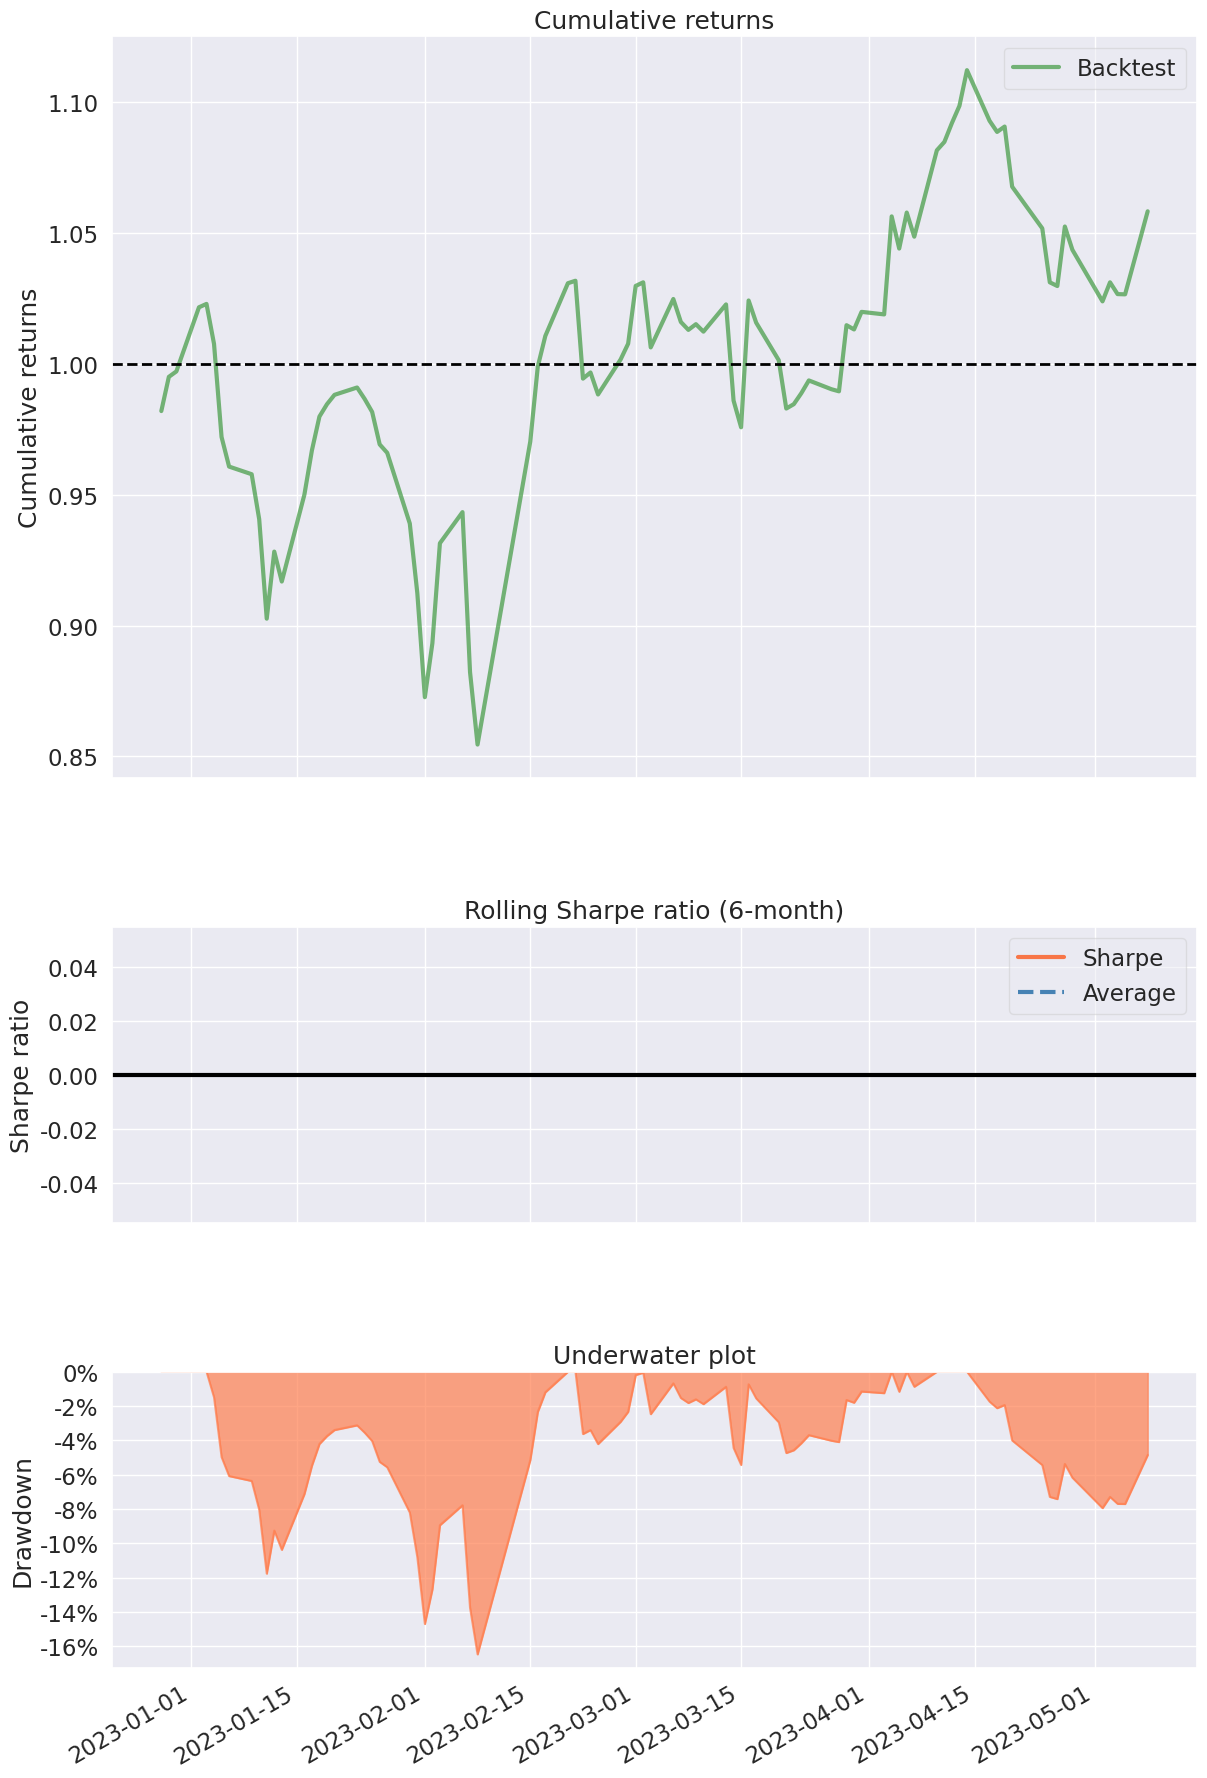

In [ ]:
OrderedTable, IDEAL_PF, Residue_Cash = ConstructPortfolioTimeSeries(show_df)
display(OrderedTable['PF_Value'])
ShowTearSheet(OrderedTable['pct_change'].dropna())
OrderedTable.to_csv(f"Best_PF_TimeSeries_{exchange}.csv")

*MARKET HEALTH INDICATOR* = Moving Sharpe Ratio LB of 77 days

<Axes: title={'center': 'Underwater plot'}, ylabel='Drawdown'>

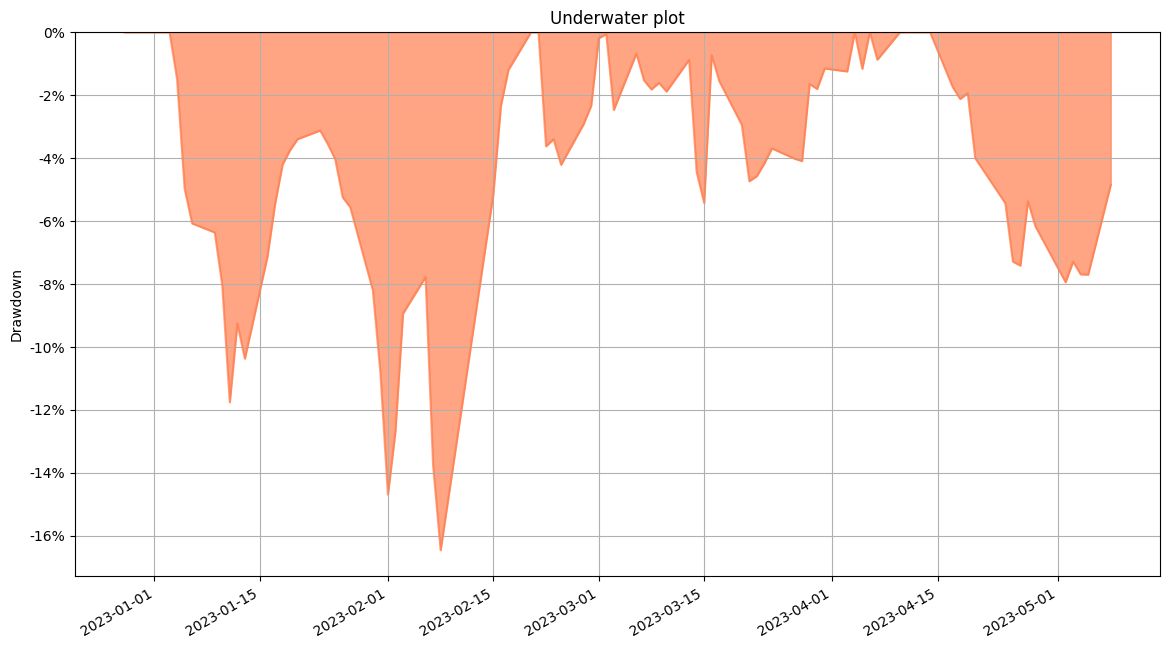

In [ ]:
pyfolio.plot_drawdown_underwater(OrderedTable['pct_change'].dropna(), grid=True, figsize=(14, 8))

<Axes: title={'center': 'Monthly returns (%)'}, xlabel='Month', ylabel='Year'>

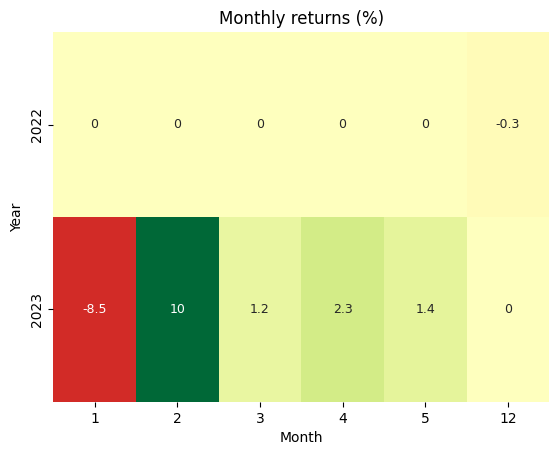

In [ ]:
pyfolio.plot_monthly_returns_heatmap(OrderedTable['pct_change'].dropna())

In [ ]:
import pyfolio as pf
pystats_df = pf.timeseries.perf_stats(OrderedTable['pct_change'].dropna())
max_drawdown = np.abs(100*pf.timeseries.max_drawdown(OrderedTable['pct_change'].dropna()))
annual_return = pf.timeseries.annual_return(OrderedTable['pct_change'].dropna())
sharpe_ratio = pf.timeseries.sharpe_ratio(OrderedTable['pct_change'].dropna())
print("NEW PORTFOLIO PERFORMANCE")
pystats_df


NEW PORTFOLIO PERFORMANCE


Annual return          0.176465
Cumulative returns     0.058392
Annual volatility      0.393108
Sharpe ratio           0.603117
Calmar ratio           1.071780
Stability              0.429225
Max drawdown          -0.164647
Omega ratio            1.121303
Sortino ratio          1.015388
Skew                   1.623283
Kurtosis               8.744733
Tail ratio             0.967413
Daily value at risk   -0.048586
dtype: float64

In [ ]:
print(f"daily mean return for new portfolio = %{np.round(pf_data['PF_Rets'].mean()*100,3)}")

daily mean return for new portfolio = %0.094


In [ ]:
# BEST_PF = pd.Series(np.array(IDEAL_PF['End PF %']), np.array(IDEAL_PF['assets']))
# a = pd.DataFrame(BEST_PF,  columns=['%'] )
# a

In [ ]:
IDEAL_PF['Rebalance Buy Price'] = show_df['buy_price']
IDEAL_PF['Rebalance Shares'] = show_df['shares_to_buy']
IDEAL_PF = np.round(IDEAL_PF,4)
IDEAL_PF.to_csv(f"Best_PF_For_{exchange}.csv")

In [ ]:
# from google.colab import files
# files.download(f"Best_PF_For_{exchange}.csv")
# print("........................................files downloaded ........................................")

In [ ]:
from datetime import date, timedelta, datetime
start_time = datetime.now()
start_time

datetime.datetime(2023, 12, 29, 23, 27, 11, 536662)

In [ ]:
display(IDEAL_PF)

,assets,%,Amount,buy_price,shares_to_buy,Portfolio_Weights,InitialPrices,FinalPrices,Portfolio_Amounts,Portfolio_Shares,Purchased Value,Market Value,PnL %,Start PF %,End PF %,Final_Cost,Rebalance Buy Price,Rebalance Shares
2,BIMAS.IS,72.84,72840.0,158.67,459.0,0.7284,134.11,158.67,72840.0,543,72821.73,86157.81,18.31,72.87,81.45,81450.0,158.67,459.0
17,EREGL.IS,23.65,23650.0,30.62,772.0,0.2365,40.68,30.62,23650.0,581,23635.08,17790.22,-24.73,23.65,16.82,16820.0,30.62,772.0
10,KOZAL.IS,3.51,3510.0,16.35,214.0,0.0351,31.1,16.35,3510.0,112,3483.2,1831.20,-47.43,3.49,1.73,1730.0,16.35,214.0


In [ ]:
sum(IDEAL_PF['Final_Cost'])

100000.0

In [ ]:
sum(IDEAL_PF['Market Value'])

105779.23

In [ ]:
TOTAL_REBALANCE_PURCHASE = IDEAL_PF['Final_Cost'].sum()
print(f"This portfolio started with : {np.round(IDEAL_PF['Purchased Value'].sum(),2)} TL", )
print(f"This portfolio ended up with : {np.round(IDEAL_PF['Market Value'].sum(),2)} TL in {look_back} days", )

print(f"TOTAL REBALANCE PURCHASE will be: {np.round(TOTAL_REBALANCE_PURCHASE,2)} ", )
print(f"RESIDUE CASH will be: {np.round(Residue_Cash)} ", )
print('----------------------------------------------------------------------------------------')
print("Make sure that you buy the exact amount of shares (Rebalance Shares) shown on the table IDEAL_PF.")

This portfolio started with : 99940.01 TL
This portfolio ended up with : 105779.23 TL in 132 days
TOTAL REBALANCE PURCHASE will be: 100000.0 
RESIDUE CASH will be: 60.0 
----------------------------------------------------------------------------------------
Make sure that you buy the exact amount of shares (Rebalance Shares) shown on the table IDEAL_PF.


In [ ]:
CUSTOMER_VIEW = IDEAL_PF[['assets','End PF %','Rebalance Buy Price', 'Rebalance Shares', 'Final_Cost']]
CUSTOMER_VIEW

,assets,End PF %,Rebalance Buy Price,Rebalance Shares,Final_Cost
2,BIMAS.IS,81.45,158.67,459.0,81450.0
17,EREGL.IS,16.82,30.62,772.0,16820.0
10,KOZAL.IS,1.73,16.35,214.0,1730.0


In [ ]:

print(f"Total Cost: {IDEAL_PF['Final_Cost'].sum()}")

Total Cost: 100000.0


**Sharpe ratio**: The Sharpe ratio measures the excess return (the return above the risk-free rate) per unit of volatility or standard deviation. Like the Omega ratio, it measures the risk-adjusted return of a portfolio or investment but does not consider the likelihood of incurring large losses. Instead, it looks at the overall volatility, which exhibits poor efficiency as a risk denominator.


**Treynor ratio**: Both the Omega and the Treynor ratios take into account the risk of an investment. However, the Treynor ratio uses systematic risk, also known as beta, in its denominator. That means the Omega ratio captures the total risk of an investment, while the Treynor ratio only captures the risk that is not diversifiable.


**Calmar ratio**: Like the Omega, the Calmar ratio measures the risk-adjusted performance of an investment. However, it uses the maximum drawdown as the risk measure. The maximum drawdown is the maximum percentage loss from a peak to a trough, representing the worst-case scenario. That means that the Omega ratio captures the total risk of an investment, while the Calmar ratio captures the worst-case scenario.

In [ ]:
if SAVE_PF:
  NEW_PORTFOLIO_FILENAME = GenerateNewPortfolioFilename()
  print("New Portfolio will be saved as: ", NEW_PORTFOLIO_FILENAME )
  with pd.ExcelWriter(NEW_PORTFOLIO_FILENAME) as writer:  # doctest: +SKIP
      pystats_df.to_excel(writer, sheet_name = 'PF STATS')
      show_df.to_excel(writer, sheet_name = 'PF ASSETS')
      #worksheet = writer.sheets['PF STATS']
      #worksheet.insert_image(5, 5, "Fig1_ClosePrices.jpg")
      writer.save()

# from google.colab import files
# files.download(filename)

New Portfolio will be saved as:  ON2_ALPER_MINVAR_D2023-12-29_P100.0K_bist30_LB132_OFF235_PB1_NEG=False_LONG=True.xlsx


In [ ]:
# from openpyxl import load_workbook
# import pandas as pd
# df_new = pd.DataFrame({'Col_C': [9, 10, 11, 12]})
# wb = load_workbook('test.xlsx')

# ws = wb['Sheet1']

# for index, row in df_new.iterrows():
#     cell = 'C%d'  % (index + 2)
#     ws[cell] = row[0]

# wb.save('test.xlsx')



In [ ]:
# from openpyxl import load_workbook
# import pandas as pd

# wb = load_workbook(filename)

# ws = wb['PF STATS']

# for index
#     cell = 'C%d'  % (index + 2)
#     ws[cell] =

# wb.save('test.xlsx')

In [ ]:
def SendEmailThroughGmail(filename):
    '''

    UTILITY U=019 : SEND_EMAIL_THRU_GMAIL
    --------------------------------------------
    - SETS variables for mail server
    - SETS database to be emailed
    - SETS filename to be attached
    - CHANGES directory for writing the excel file
    - FORMS the excel file
    - SETS params for mail and its content with smtp lib
    - ATTACHES file with mimetypes
    - SENDS mail to my own gmail address with ssl library

    '''

    gmail_pass = "owypdnplmjxuofwg" #"tinvqeuucaczivic"  #uwyuympejcjvaikg
    user = "alperulku1970@gmail.com"
    subscribers = "alperulku1970@gmail.com"
    SERVER_ADDRESS = "smtp.gmail.com"
    SERVER_PORT = 587

    #now = datetime.now()
    # Final_TEFAS_PF['Max Drawdown %'] = np.round(MaxDrawdown, 4)
    # IDEALPF['Max Drawdown'] = np.round(MaxDrawdown, 4)
    # Final_TEFAS_PF.to_csv(filename_statement + ".csv")

    shopping_list_file = 'ShoppingList.csv'
    #os.chdir(out)




    # with pd.ExcelWriter(filename) as writer:  # doctest: +SKIP
    #     #Final_TEFAS_PF.to_excel(writer, sheet_name = 'Yeni Portföy')
    #     #df = pd.DataFrame(Kurallar)
    #     #df.to_excel(writer, sheet_name='Kurallar')
    #     df = pd.DataFrame(Performance)
    #     df.to_excel(writer, sheet_name='İdeal PF Performans')
    #     df = pd.DataFrame(Current_PF)
    #     df.to_excel(writer, sheet_name='Mevcut PF')
    #     IDEALPF.to_excel(writer, sheet_name = 'Ideal PF')
    #     if FW_TEST_PERIOD !=0:
    #         ShoppingList.to_excel(writer, sheet_name='Fark Alış-Satış Listesi')

    global exchange
    import smtplib
    from email.message import EmailMessage

    msg = EmailMessage()

    msg['Subject'] = filename
    msg['From'] = user
    msg['To'] = subscribers

    text = f"Merhaba, bugünün {exchange} piyasası için en iyi Sharpe Oranı'na sahip Portföyü ektedir: {filename} \r\n"

    text+= "Markov Markowitz, Çankaya, Ankara, Türkiye.\r\n"
    text+= "Her hakkı saklıdır. @ Markov Markowitz 2022-2023."


    msg.set_content(text)

    import mimetypes

    #path = f"/Users/alperulku/Desktop/Masaüstü - Alper’s Mac mini/MY BEST PORTFOLIOS/{filename}"
    path =  filename

    # Guess the content type based on the file's extension.
    ctype, encoding = mimetypes.guess_type(path)
    if ctype is None or encoding is not None:
        ctype = 'application/octet-stream'
    maintype, subtype = ctype.split('/', 1)

    with open(path, 'rb') as fp:
        msg.add_attachment(fp.read(), maintype=maintype, subtype=subtype,
                           filename=filename)

    path =  filename
    with open(path, 'rb') as fp:
        msg.add_attachment(fp.read(), maintype=maintype, subtype=subtype,
                           filename=filename)


    # path = root + "/" + f"MPT_v{version}_TEST.pdf"
    # with open(path, 'rb') as fp:
    #     msg.add_attachment(fp.read(), maintype=maintype, subtype=subtype,
    #                        filename=f"MPT_v{version}_TEST.pdf")



    import ssl

    # Create a SSLContext object with default settings.
    context = ssl.create_default_context()

    with smtplib.SMTP(SERVER_ADDRESS, SERVER_PORT) as smtp:
        smtp.ehlo()  # Say EHLO to server
        smtp.starttls(context=context)  # Puts the connection in TLS mode.
        smtp.ehlo()
        smtp.login(user, gmail_pass)
        smtp.send_message(msg)  # Auto detects the sender and recipient from header

    print("mail sent with success with attachment")



In [ ]:
if SEND_MAIL:
  filename = GenerateNewPortfolioFilename()
  SendEmailThroughGmail(filename)


mail sent with success with attachment


BURADAN İTİBAREN BACKTEST SÜRESİ KADAR ANALİZ YAPILACAK
-------------------------------------------------------
-------------------------------------------------------


In [ ]:
price_list = []

print(LENGTH*"*")
print("Starting Download ...")
print(LENGTH*"*")
for tick in stock_list:
        print(f"Downloading {tick}")
        yf_tick = yf.Ticker(tick)
        df = yf_tick.history(interval='1d', auto_adjust=True, start=BACKTEST_START_DATE, end=BACKTEST_END_DATE, back_adjust = True, rounding=True)
        df.dropna(how='all', inplace=True)
        price_list.append(df)
print(LENGTH*"*")

print(LENGTH*"*")

## Save datafiles to disk

for i,df in enumerate(price_list):
        df.to_csv(f"{stock_list[i]}.csv")

****************************************************************
Starting Download ...
****************************************************************
****************************************************************
****************************************************************


In [ ]:
if BACKTEST == 0:
  print("BACKTEST period is 0, so, analysis is completed")
  exit(0)

<Figure size 640x480 with 0 Axes>

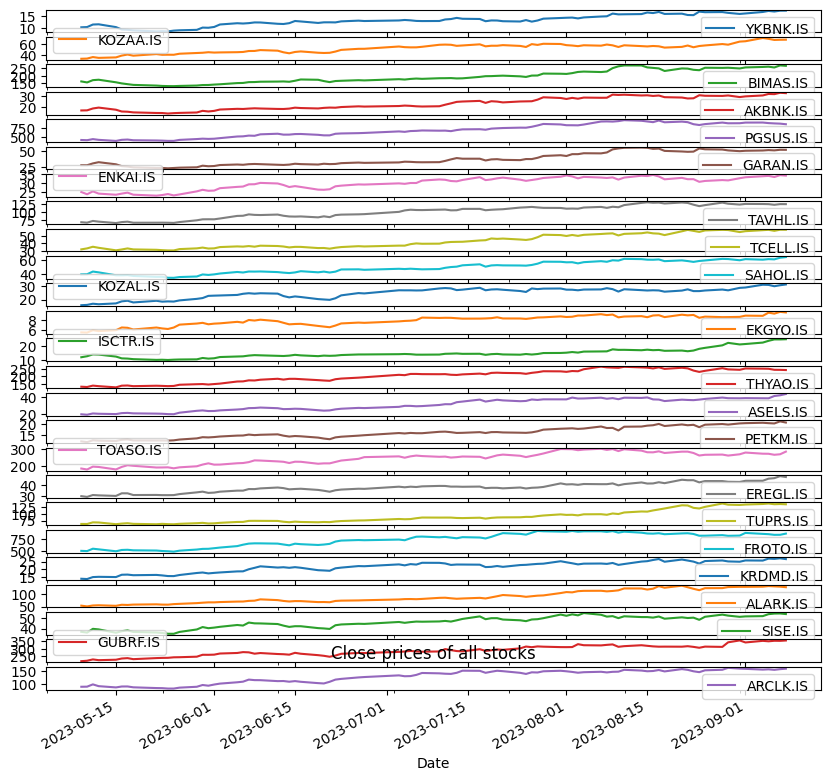

In [ ]:
Stocks = stock_list
pf_data = pd.DataFrame()
li = pd.DataFrame() # my real portfolio dataframe for close
lu = pd.DataFrame() # my real portfolio dataframe for open
rets = pd.DataFrame()
names = []
count = len(Stocks)

# os.chdir(wd)
#for file in sorted2.Stock:
for file in Stocks:
    pf_data = pd.read_csv(f"{file}.csv", index_col='Date', parse_dates=True, keep_date_col = True, infer_datetime_format=True, dayfirst=True, decimal="." )

    li = pd.concat( [li,pf_data['Close']],axis=1) #, ignore_index=True)
    lu = pd.concat( [lu,pf_data['Open']],axis=1) #, ignore_index=True)
    # st_name = file.split('.',maxsplit = 1)
    # names.append(st_name[0])
    names.append(file)

li.columns = names
lu.columns = names

li = li.rename_axis(index="Date")
lu = lu.rename_axis(index="Date")

pf_data = li.sort_values(by=['Date'], ascending=[True])
pf_data_open = lu.sort_values(by=['Date'], ascending=[True])

pf_data.to_csv(f'{exchange}.csv')
pf_data_open.to_csv(f'{exchange}_open.csv')


plt.figure()
pf_data.plot(subplots = True,figsize = (10,10))
plt.title("Close prices of all stocks")
plt.savefig("Fig1_ClosePrices.jpg", format='jpg', dpi=300)
plt.show()
if  OPEN_CLOSE_SHARPE:
  log_returns = np.log(pf_data_open / pf_data.shift(1)) - COMISSION_PERCENT*2
else:
  log_returns = np.log(pf_data/pf_data.shift(1)) - COMISSION_PERCENT*2

In [ ]:
log_returns

log_returns.describe()
np.round(log_returns.mean(),4)
yearly_rets = np.round(log_returns.mean() * 252,2) # Mean returns annualized for year
yearly_rets

vol = np.round(log_returns.std()*np.sqrt(252),3) # annualized version of std deviation
vol

risk_free_rate = 0.23

sharpe = (yearly_rets - risk_free_rate)/vol
sharpe

max_sr_vol = vol[sharpe.argmax()] # risk corresponding to maximum sharpe ratio
max_sr_ret = yearly_rets[sharpe.argmax()] # return corresponding to maximum sharpe ratio


In [ ]:
log_returns


,YKBNK.IS,KOZAA.IS,BIMAS.IS,AKBNK.IS,PGSUS.IS,GARAN.IS,ENKAI.IS,TAVHL.IS,TCELL.IS,SAHOL.IS,...,PETKM.IS,TOASO.IS,EREGL.IS,TUPRS.IS,FROTO.IS,KRDMD.IS,ALARK.IS,SISE.IS,GUBRF.IS,ARCLK.IS
Date,,,,,,,,,,,,,,,,,,,,,
2023-05-09 00:00:00+03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-05-10 00:00:00+03:00,0.008379,0.009816,-0.043789,0.004767,-0.014544,-0.001904,-0.051699,-0.021090,0.038602,0.002849,...,-0.029535,-0.034026,-0.023386,-0.004259,-0.010900,-0.014178,-0.057634,-0.021740,0.012625,0.003206
2023-05-11 00:00:00+03:00,0.093330,0.083933,0.093794,0.094056,0.064472,0.093533,0.063495,0.074713,0.062658,0.092272,...,0.066609,0.093699,0.054333,0.094081,0.094099,0.085630,0.068951,0.093758,0.039164,0.090125
2023-05-12 00:00:00+03:00,0.007436,-0.045195,0.015310,0.041157,-0.044729,0.057915,-0.050970,-0.031304,-0.041443,-0.028241,...,-0.013919,-0.012061,-0.010893,-0.008261,-0.026018,0.010047,0.013964,-0.014626,-0.023873,-0.071749
2023-05-15 00:00:00+03:00,-0.106274,0.024176,-0.106407,-0.106042,-0.068416,-0.106225,-0.027046,-0.065028,-0.105740,-0.106246,...,-0.014893,-0.082978,-0.017567,-0.101913,-0.078779,-0.011117,-0.041154,-0.086613,0.012199,-0.054371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-04 00:00:00+03:00,0.035988,0.088261,0.011076,0.026990,0.000481,0.006635,0.015457,-0.003609,0.022127,-0.014304,...,0.007517,-0.026472,-0.000293,0.014106,-0.024047,-0.004316,0.003469,0.003629,0.030330,-0.019270
2023-09-05 00:00:00+03:00,0.024208,-0.022826,0.005628,0.042187,-0.018024,0.011403,0.004682,-0.004421,0.007323,0.011904,...,-0.009917,-0.003030,0.040982,0.011807,-0.008782,0.047163,0.017184,0.034755,-0.009986,0.005686
2023-09-06 00:00:00+03:00,-0.015893,-0.031994,-0.021824,-0.006283,-0.010696,-0.009908,-0.020147,-0.017461,-0.025213,-0.006912,...,-0.008033,-0.023798,0.008750,-0.020447,-0.017223,-0.007914,-0.010312,0.008971,0.008996,-0.013796


In [ ]:
log_returns.describe()

,YKBNK.IS,KOZAA.IS,BIMAS.IS,AKBNK.IS,PGSUS.IS,GARAN.IS,ENKAI.IS,TAVHL.IS,TCELL.IS,SAHOL.IS,...,PETKM.IS,TOASO.IS,EREGL.IS,TUPRS.IS,FROTO.IS,KRDMD.IS,ALARK.IS,SISE.IS,GUBRF.IS,ARCLK.IS
count,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,...,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000
mean,0.004915,0.007914,0.004844,0.006740,0.006982,0.006157,0.002503,0.005941,0.006019,0.004708,...,0.005281,0.004208,0.004304,0.008329,0.005300,0.006559,0.009170,0.003369,0.004875,0.005635
std,0.037099,0.040251,0.034316,0.039092,0.032804,0.039232,0.028379,0.031001,0.032592,0.030717,...,0.029448,0.034352,0.026230,0.033469,0.029880,0.036153,0.035153,0.032464,0.025867,0.033576
min,-0.106274,-0.068293,-0.106407,-0.106042,-0.068416,-0.106225,-0.055545,-0.065028,-0.105740,-0.106246,...,-0.067554,-0.082978,-0.050143,-0.101913,-0.078779,-0.078351,-0.057634,-0.086613,-0.051856,-0.071749
25%,-0.014441,-0.022466,-0.014369,-0.015589,-0.016553,-0.017784,-0.019185,-0.013447,-0.015286,-0.014305,...,-0.013845,-0.023971,-0.014249,-0.009518,-0.018791,-0.019133,-0.013427,-0.017985,-0.011568,-0.019327
50%,0.003863,0.005531,0.003141,0.004601,0.002711,0.004246,0.009342,0.002426,0.006571,0.002937,...,0.004654,0.003504,0.000735,0.003754,-0.000069,0.004932,0.010354,-0.000800,0.003038,0.002718
75%,0.024474,0.035220,0.022332,0.029863,0.025560,0.027850,0.021394,0.020485,0.029170,0.026031,...,0.023247,0.029689,0.018363,0.030484,0.023266,0.026026,0.027844,0.022176,0.017655,0.031369
max,0.093721,0.093958,0.094019,0.094056,0.089772,0.094110,0.067681,0.093598,0.093698,0.092272,...,0.094110,0.093912,0.079682,0.094133,0.094099,0.092599,0.093965,0.093758,0.094081,0.090125


In [ ]:
yearly_rets

YKBNK.IS    1.24
KOZAA.IS    1.99
BIMAS.IS    1.22
AKBNK.IS    1.70
PGSUS.IS    1.76
GARAN.IS    1.55
ENKAI.IS    0.63
TAVHL.IS    1.50
TCELL.IS    1.52
SAHOL.IS    1.19
KOZAL.IS    1.71
EKGYO.IS    1.36
ISCTR.IS    1.86
THYAO.IS    1.63
ASELS.IS    2.05
PETKM.IS    1.33
TOASO.IS    1.06
EREGL.IS    1.08
TUPRS.IS    2.10
FROTO.IS    1.34
KRDMD.IS    1.65
ALARK.IS    2.31
SISE.IS     0.85
GUBRF.IS    1.23
ARCLK.IS    1.42
dtype: float64

Sharpe Ratio = 2.7543035993740217
Max Sharpe Ratio = 3.7275985663082434
Max Sharpe Ratio Return = 2.31
Max Sharpe Ratio Volatility = 0.558


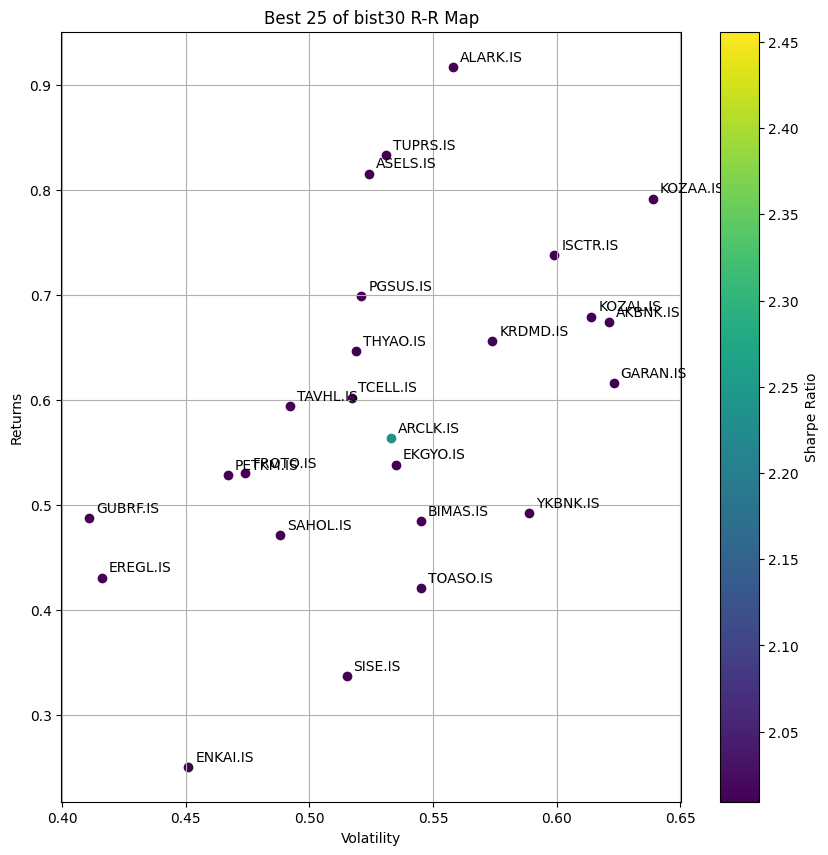

Max Sharpe Ratio = 3.7275985663082434
Max Sharpe Ratio Return = 2.31
Max Sharpe Ratio Volatility = 0.558


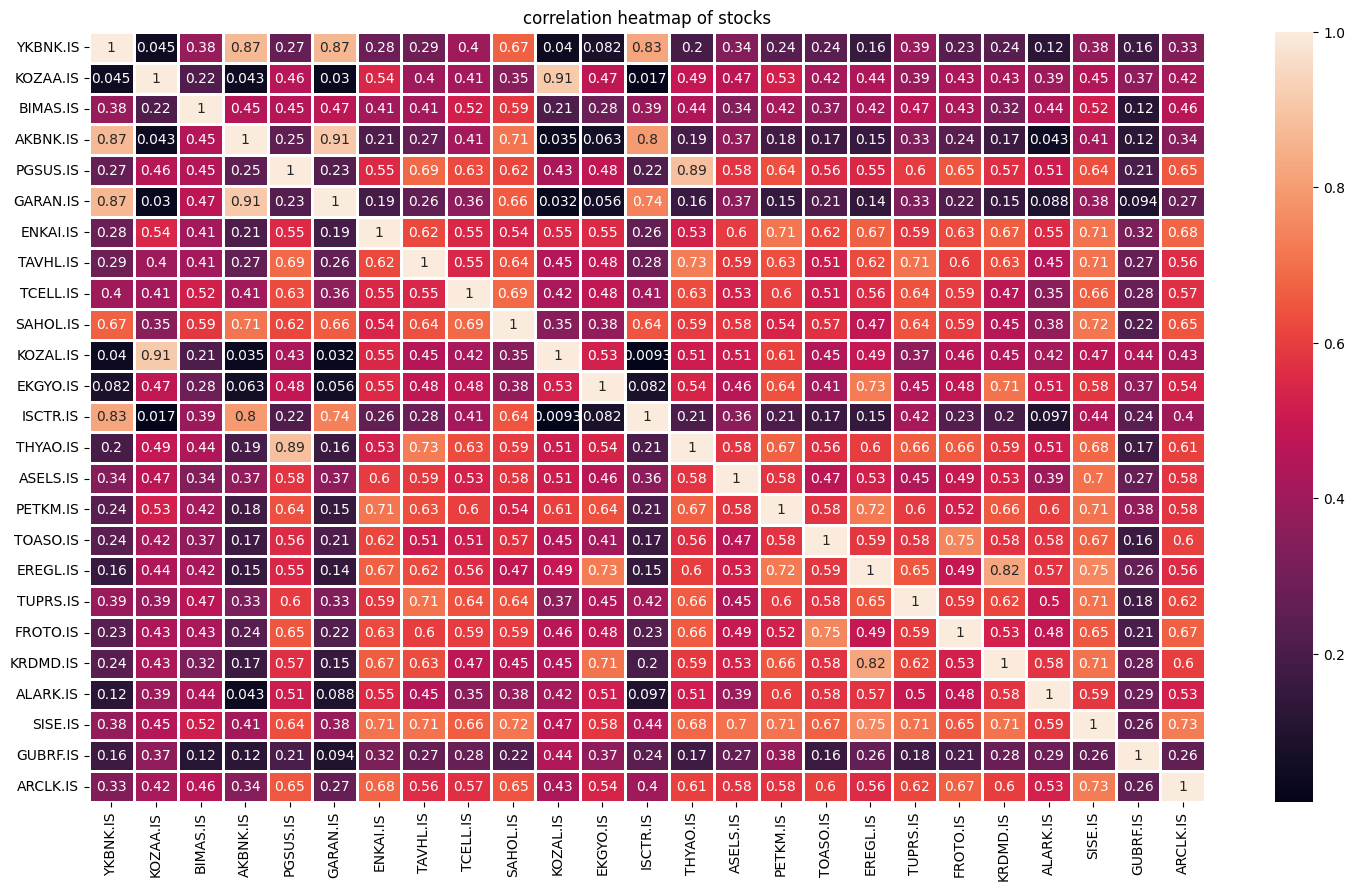

In [ ]:
vol, ASSETS,sharpe = PrintSharpePerformance()

PlotRRMap()

print(f"Max Sharpe Ratio = {sharpe.max()}")
print(f"Max Sharpe Ratio Return = {max_sr_ret}")
print(f"Max Sharpe Ratio Volatility = {max_sr_vol}")


plt.figure(figsize=(18,10))
sns.heatmap(log_returns.corr(),linecolor='white',linewidths=1,annot=True)
plt.title("correlation heatmap of stocks")
plt.savefig("Fig3_Correlation_Heatmap.jpg", format='jpg', dpi=300)
plt.show()


In [ ]:
pf_data

,YKBNK.IS,KOZAA.IS,BIMAS.IS,AKBNK.IS,PGSUS.IS,GARAN.IS,ENKAI.IS,TAVHL.IS,TCELL.IS,SAHOL.IS,...,PETKM.IS,TOASO.IS,EREGL.IS,TUPRS.IS,FROTO.IS,KRDMD.IS,ALARK.IS,SISE.IS,GUBRF.IS,ARCLK.IS
Date,,,,,,,,,,,,,,,,,,,,,
2023-05-09 00:00:00+03:00,10.39,32.50,161.89,16.71,430.0,28.40,25.18,68.55,31.77,39.44,...,12.17,182.7,30.08,62.21,509.68,13.96,53.58,36.89,215.5,90.58
2023-05-10 00:00:00+03:00,10.49,32.86,155.14,16.81,424.3,28.38,23.94,67.20,33.06,39.60,...,11.83,176.8,29.42,62.02,504.76,13.78,50.64,36.14,218.5,90.98
2023-05-11 00:00:00+03:00,11.53,35.78,170.60,18.49,453.1,31.20,25.54,72.50,35.24,43.48,...,12.66,194.4,31.10,68.22,555.23,15.03,54.32,39.74,227.5,99.68
2023-05-12 00:00:00+03:00,11.63,34.24,173.44,19.29,433.8,33.10,24.30,70.35,33.85,42.32,...,12.50,192.3,30.80,67.74,541.62,15.20,55.15,39.21,222.4,92.89
2023-05-15 00:00:00+03:00,10.47,35.12,156.12,17.37,405.6,29.80,23.68,66.00,30.49,38.10,...,12.33,177.2,30.30,61.25,501.19,15.05,52.99,36.00,225.4,88.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-04 00:00:00+03:00,16.71,72.45,259.82,30.22,893.1,51.25,33.90,124.40,57.25,60.65,...,20.74,273.5,44.10,138.25,868.45,25.63,128.81,51.90,354.4,156.30
2023-09-05 00:00:00+03:00,17.14,70.90,261.60,31.56,878.2,51.90,34.10,124.00,57.74,61.45,...,20.56,273.0,46.00,140.06,861.89,26.90,131.20,53.80,351.3,157.38
2023-09-06 00:00:00+03:00,16.89,68.75,256.26,31.40,869.9,51.45,33.46,122.00,56.37,61.10,...,20.42,266.9,46.46,137.39,848.19,26.72,130.01,54.35,354.9,155.41


In [ ]:
Portfolio_Amounts = np.multiply(100000, Portfolio_Weights )
InitialPrices = pf_data.iloc[0,0:]

Portfolio_Shares = np.trunc((Portfolio_Amounts / InitialPrices)) # determine shares

np.shape(Portfolio_Shares)

Prices = pf_data.iloc[:,0:]
Prices


pf_data['Portfolio'] = np.dot(Portfolio_Shares, Prices.T)  # PF_VALUE = dot product of shares and their prices !!!!
pf_data['PF_Rets'] = pf_data['Portfolio'].pct_change()

In [ ]:
Portfolio_Shares

YKBNK.IS      0.0
KOZAA.IS      0.0
BIMAS.IS    449.0
AKBNK.IS      0.0
PGSUS.IS      0.0
GARAN.IS      0.0
ENKAI.IS      0.0
TAVHL.IS      0.0
TCELL.IS      0.0
SAHOL.IS      0.0
KOZAL.IS    220.0
EKGYO.IS      0.0
ISCTR.IS      0.0
THYAO.IS      0.0
ASELS.IS      0.0
PETKM.IS      0.0
TOASO.IS      0.0
EREGL.IS    786.0
TUPRS.IS      0.0
FROTO.IS      0.0
KRDMD.IS      0.0
ALARK.IS      0.0
SISE.IS       0.0
GUBRF.IS      0.0
ARCLK.IS      0.0
Name: 2023-05-09 00:00:00+03:00, dtype: float64

In [ ]:
pf_data['Portfolio']

Date
2023-05-09 00:00:00+03:00     99836.09
2023-05-10 00:00:00+03:00     96334.98
2023-05-11 00:00:00+03:00    104784.00
2023-05-12 00:00:00+03:00    105741.96
2023-05-15 00:00:00+03:00     97704.28
                               ...    
2023-09-04 00:00:00+03:00    158080.18
2023-09-05 00:00:00+03:00    160346.40
2023-09-06 00:00:00+03:00    158099.10
2023-09-07 00:00:00+03:00    166016.68
2023-09-08 00:00:00+03:00    164177.55
Name: Portfolio, Length: 84, dtype: float64

In [ ]:
InitialPrices

YKBNK.IS     10.39
KOZAA.IS     32.50
BIMAS.IS    161.89
AKBNK.IS     16.71
PGSUS.IS    430.00
GARAN.IS     28.40
ENKAI.IS     25.18
TAVHL.IS     68.55
TCELL.IS     31.77
SAHOL.IS     39.44
KOZAL.IS     15.93
EKGYO.IS      5.49
ISCTR.IS     12.12
THYAO.IS    128.80
ASELS.IS     19.98
PETKM.IS     12.17
TOASO.IS    182.70
EREGL.IS     30.08
TUPRS.IS     62.21
FROTO.IS    509.68
KRDMD.IS     13.96
ALARK.IS     53.58
SISE.IS      36.89
GUBRF.IS    215.50
ARCLK.IS     90.58
Name: 2023-05-09 00:00:00+03:00, dtype: float64

In [ ]:
#pyfolio.create_simple_tear_sheet(pf_data['PF_Rets'].dropna())

______________________________________________________________________

Performing STEP-3:
Construct Time series...
 Residue cash: 163.9100000000035 



Date
2023-05-09 00:00:00+03:00     100000.0
2023-05-10 00:00:00+03:00     96498.89
2023-05-11 00:00:00+03:00    104947.91
2023-05-12 00:00:00+03:00    105905.87
2023-05-15 00:00:00+03:00     97868.19
                               ...    
2023-09-04 00:00:00+03:00    158244.09
2023-09-05 00:00:00+03:00    160510.31
2023-09-06 00:00:00+03:00    158263.01
2023-09-07 00:00:00+03:00    166180.59
2023-09-08 00:00:00+03:00    164341.46
Name: PF_Value, Length: 84, dtype: object

______________________________________________________________________

Performing STEP-4:
Showing Tearsheet of Portfolio...
********* PORTFOLIO TEARSHEET *************** 


Start date,2023-05-10
End date,2023-09-08
Total months,3
,Backtest
Annual return,351.9%
Cumulative returns,64.3%
Annual volatility,45.6%
Sharpe ratio,3.54
Calmar ratio,19.77
Stability,0.93
Max drawdown,-17.8%


********* end of TEARSHEET **************



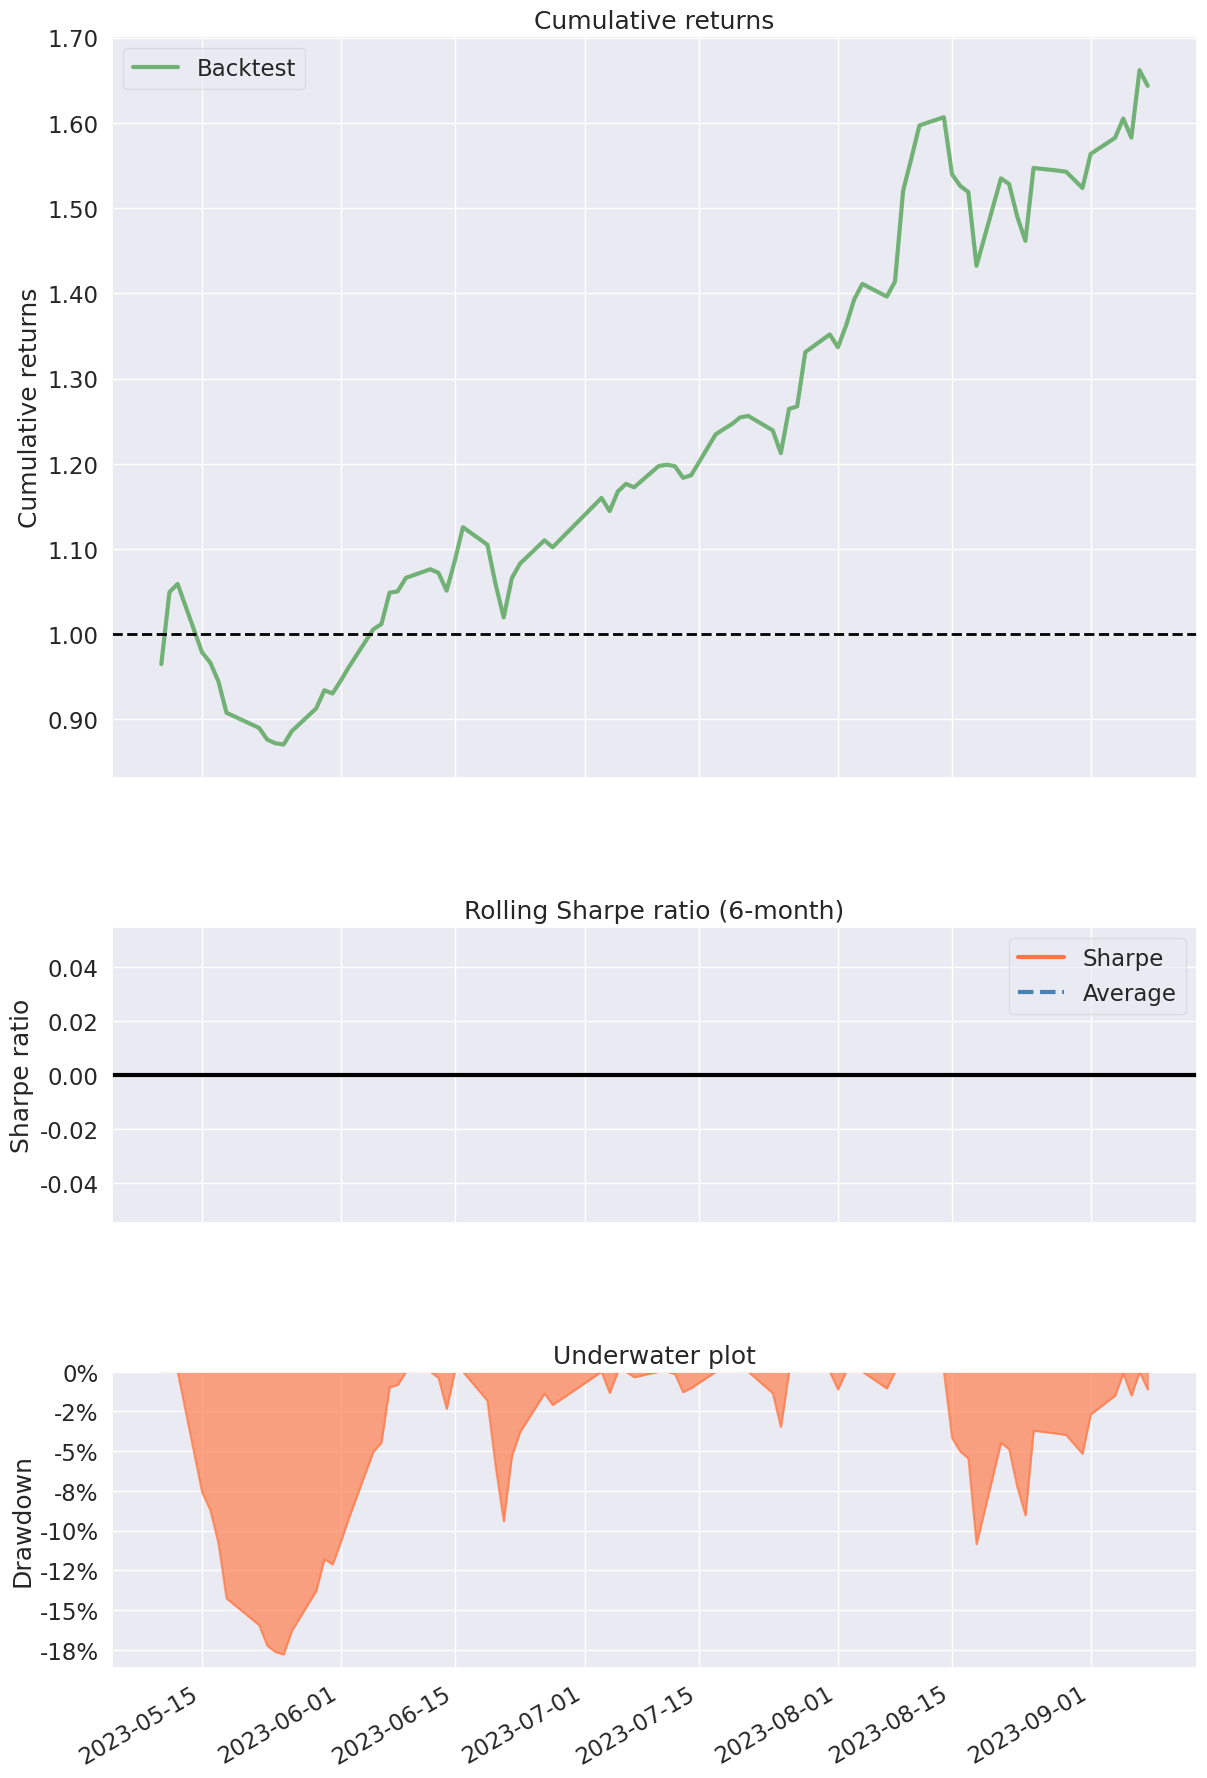

In [ ]:
OrderedTable, IDEAL_PF, Residue_Cash = ConstructPortfolioTimeSeries(show_df)
display(OrderedTable['PF_Value'])
ShowTearSheet(OrderedTable['pct_change'].dropna())
OrderedTable.to_csv(f"Best_PF_TimeSeries_{exchange}.csv")

In [ ]:
pystats_df = pf.timeseries.perf_stats(OrderedTable['pct_change'].dropna())
max_drawdown = np.abs(100*pf.timeseries.max_drawdown(OrderedTable['pct_change'].dropna()))
annual_return = pf.timeseries.annual_return(OrderedTable['pct_change'].dropna())
sharpe_ratio = pf.timeseries.sharpe_ratio(OrderedTable['pct_change'].dropna())
print("NEW PORTFOLIO PERFORMANCE")
pystats_df

NEW PORTFOLIO PERFORMANCE


Annual return           3.518971
Cumulative returns      0.643415
Annual volatility       0.455894
Sharpe ratio            3.541547
Calmar ratio           19.774559
Stability               0.934381
Max drawdown           -0.177954
Omega ratio             1.823854
Sortino ratio           6.316272
Skew                    0.198135
Kurtosis                0.695301
Tail ratio              1.346423
Daily value at risk    -0.051030
dtype: float64

PIYASANIN SAĞLIĞI GÖSTERGESİ

MS105 nin üzerinde olacak
Depremde ve seçimde 0 ın altına düşmüş.
Depremde -1
Seçimde -0.5
maksimuma geldiğinde 3.5

MMS 84 göstergesi gayet pürüzsüz veriyor.
Negatif sharpe ile LB = 84 iyi olabilir.


<Axes: title={'center': 'Rolling Sharpe ratio (6-month)'}, ylabel='Sharpe ratio'>

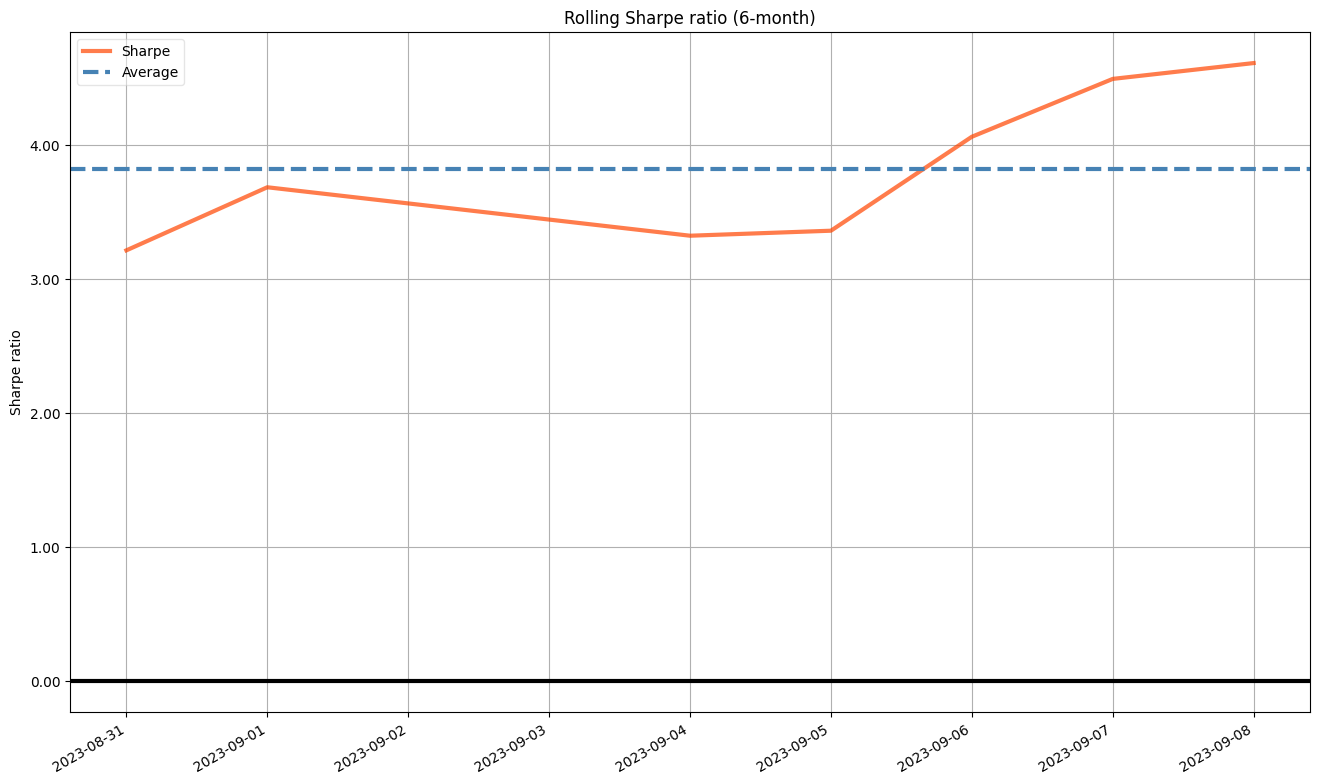

In [ ]:
pyfolio.plot_rolling_sharpe(OrderedTable['pct_change'].dropna(),rolling_window=77, grid=True, figsize=(16, 10), title = f" Market Health Index for {exchange}", xlabel = 'Date', ylabel = 'MHI')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import argrelextrema

# Generate a noisy AR(1) sample

np.random.seed(0)
rs = np.random.randn(200)
xs = [0]
for r in rs:
    xs.append(xs[-1] * 0.9 + r)

df = pd.DataFrame(xs, columns=['data'])


n = 20 # number of points to be checked before and after

# Find local peaks


df['min'] = df.iloc[argrelextrema(df.data.values, np.less_equal,
                    order=n)[0]]['data']
df['max'] = df.iloc[argrelextrema(df.data.values, np.greater_equal,
                    order=n)[0]]['data']
# plt.scatter(df.index, df['min'], c='r')
# plt.scatter(df.index, df['max'], c='g')
# plt.plot(df.index, df['data'])
# plt.show()

# Plot results



Minimums: ----------------------
 Date
2023-05-25 00:00:00+03:00    87059.45
Name: min, dtype: object
Maximums: ----------------------
 Date
2023-05-12 00:00:00+03:00    105905.87
2023-08-14 00:00:00+03:00    160661.25
2023-09-07 00:00:00+03:00    166180.59
Name: max, dtype: object


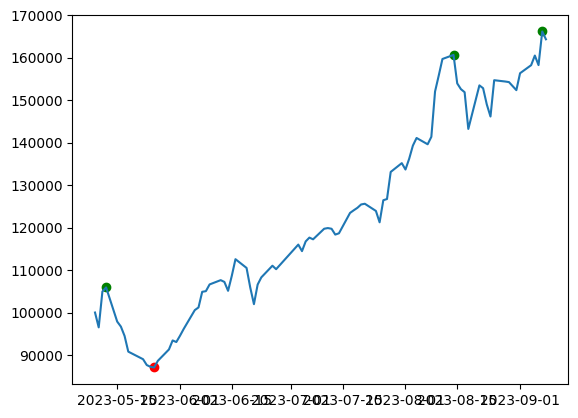

In [ ]:

df = pd.DataFrame(OrderedTable['PF_Value'].tail(600))
import numpy as np

n= np.int(LOOKBACK / 12)

df['min'] = df.iloc[argrelextrema(df['PF_Value'].values, np.less_equal,
                    order=n)[0]]['PF_Value']

df['max'] = df.iloc[argrelextrema(df['PF_Value'].values, np.greater_equal,
                    order=n)[0]]['PF_Value']

print('Minimums: ----------------------\n', df['min'].dropna())
print('Maximums: ----------------------\n', df['max'].dropna())
plt.scatter(df.index, df['min'], c='r')

plt.scatter(df.index, df['max'], c='g')




plt.plot(df.index, df['PF_Value'])
plt.show()



In [ ]:
 pystats_df = pf.timeseries.perf_stats(OrderedTable['pct_change'].dropna())
pystats_df

Annual return           3.518971
Cumulative returns      0.643415
Annual volatility       0.455894
Sharpe ratio            3.541547
Calmar ratio           19.774559
Stability               0.934381
Max drawdown           -0.177954
Omega ratio             1.823854
Sortino ratio           6.316272
Skew                    0.198135
Kurtosis                0.695301
Tail ratio              1.346423
Daily value at risk    -0.051030
dtype: float64

In [ ]:
max_drawdown_pct = np.abs(100*pf.timeseries.max_drawdown(OrderedTable['pct_change'].dropna()))
max_drawdown_pct

17.79544419964636

<Axes: title={'center': 'Underwater plot'}, ylabel='Drawdown'>

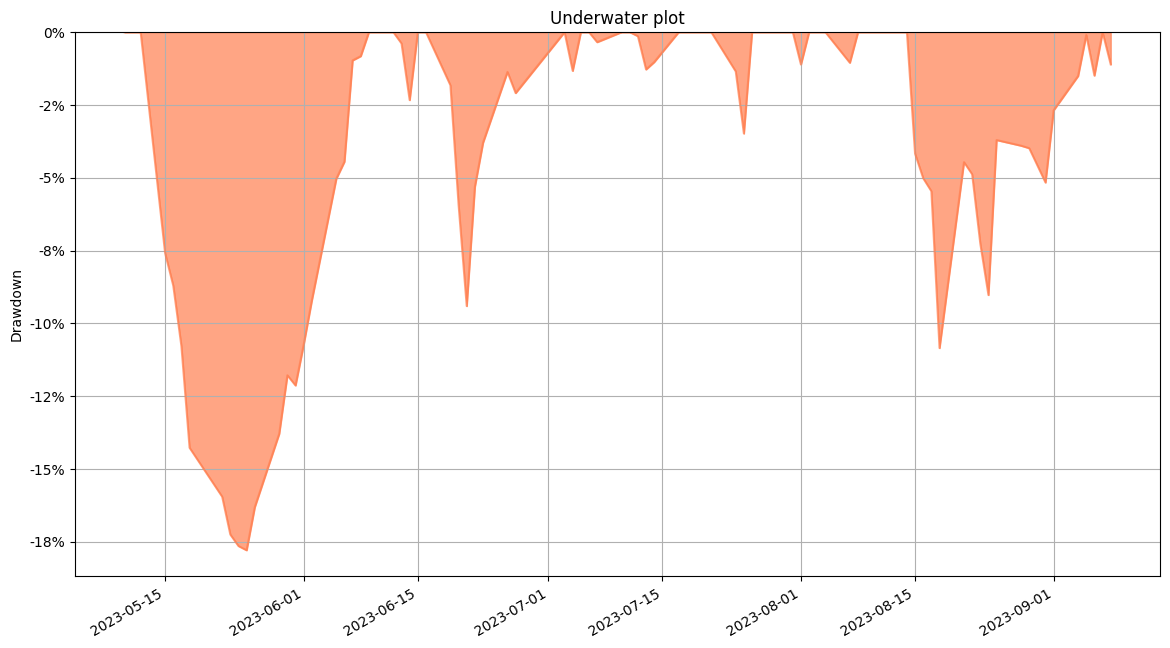

In [ ]:

pyfolio.plot_drawdown_underwater(OrderedTable['pct_change'].dropna(), grid=True, figsize=(14, 8))

<Axes: title={'center': 'Monthly returns (%)'}, xlabel='Month', ylabel='Year'>

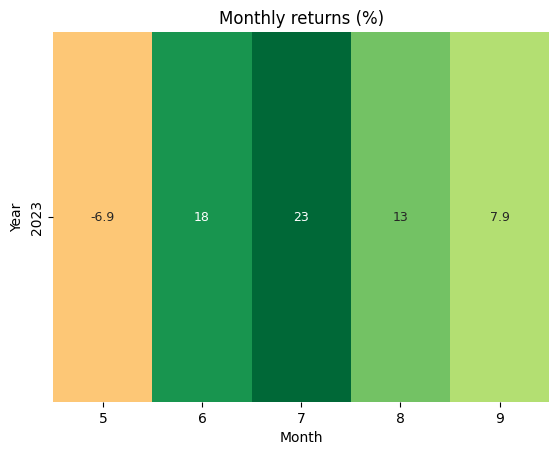

In [ ]:

pyfolio.plot_monthly_returns_heatmap(OrderedTable['pct_change'].dropna())